### Exportar a HTML

Este comando convertirá el notebook actual a un archivo HTML. El archivo se guardará en el mismo directorio donde se encuentra el notebook.

In [ ]:
!jupyter nbconvert --to html "/content/Analisis_Tendencia_Obras_Ficcion_Documental.ipynb"
print("Notebook exportado a HTML. Puedes encontrar el archivo en /content/Analisis_Tendencia_Obras_Ficcion_Documental.html")

[NbConvertApp] WARNING | pattern '/content/Analisis_Tendencia_Obras_Ficcion_Documental.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--

### Exportar a IPYNB (crear una copia)

Este comando creará una copia del notebook actual en formato IPYNB. Si ya tienes el notebook en un entorno como Colab, este es el formato original, pero puedes querer una copia para asegurarte o para limpiar las salidas.

In [ ]:
!jupyter nbconvert --to notebook --output "/content/Analisis_Tendencia_Obras_Ficcion_Documental_copy.ipynb" "/content/Analisis_Tendencia_Obras_Ficcion_Documental.ipynb"
print("Notebook copiado a IPYNB. Puedes encontrar el archivo en /content/Analisis_Tendencia_Obras_Ficcion_Documental_copy.ipynb")

[NbConvertApp] WARNING | pattern '/content/Analisis_Tendencia_Obras_Ficcion_Documental.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--

# Task
Analyze the trend of fiction and documentary works production over time, grouped by decades or 5-year periods, and visualize them in a graph, using the data from "Base de datos final .xlsx".

## Cargar Base de Datos

### Subtask:
Cargar el archivo 'Base de datos final .xlsx' en un DataFrame de pandas para su análisis.


**Reasoning**:
To load the Excel file into a pandas DataFrame, I will first import the pandas library and then use `pd.read_excel()` to load the data. Finally, I will display the head and info of the DataFrame to verify the successful loading and data types.



In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel('/content/Base de datos final .xlsx')

# Display the first few rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Display the data types of the DataFrame columns
print('\nDataFrame Info:')
df.info()

First 5 rows of the DataFrame:
                                     nombre-pelicula    anio  \
0                          La industria del salitre   1915.0   
1                          La industria del salitre   1915.0   
2  La baraja de la muerte (o El enigma de la call...  1916.0   
3                                El hombre de acero   1917.0   
4  La agonía de Arauco (o El olvido de los muertos)   1917.0   

          tipo-largometraje duracion-min tipo-filme                  color  \
0  Largometraje documental            NI     35 mm    Blanco & negro, Muda   
1  Largometraje documental            NI     35 mm    Blanco & negro, Muda   
2  Largometraje de ficción           100     35 mm    Blanco & negro, Muda   
3  Largometraje de ficción            NI     35 mm    Blanco & negro, Muda   
4  Largometraje de ficción            NI     35 mm    Blanco & negro, Muda   

             director-01   idioma consol-idioma lugar-prod consol-lugar-prod  \
0      Francisco Caamaño  Español  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


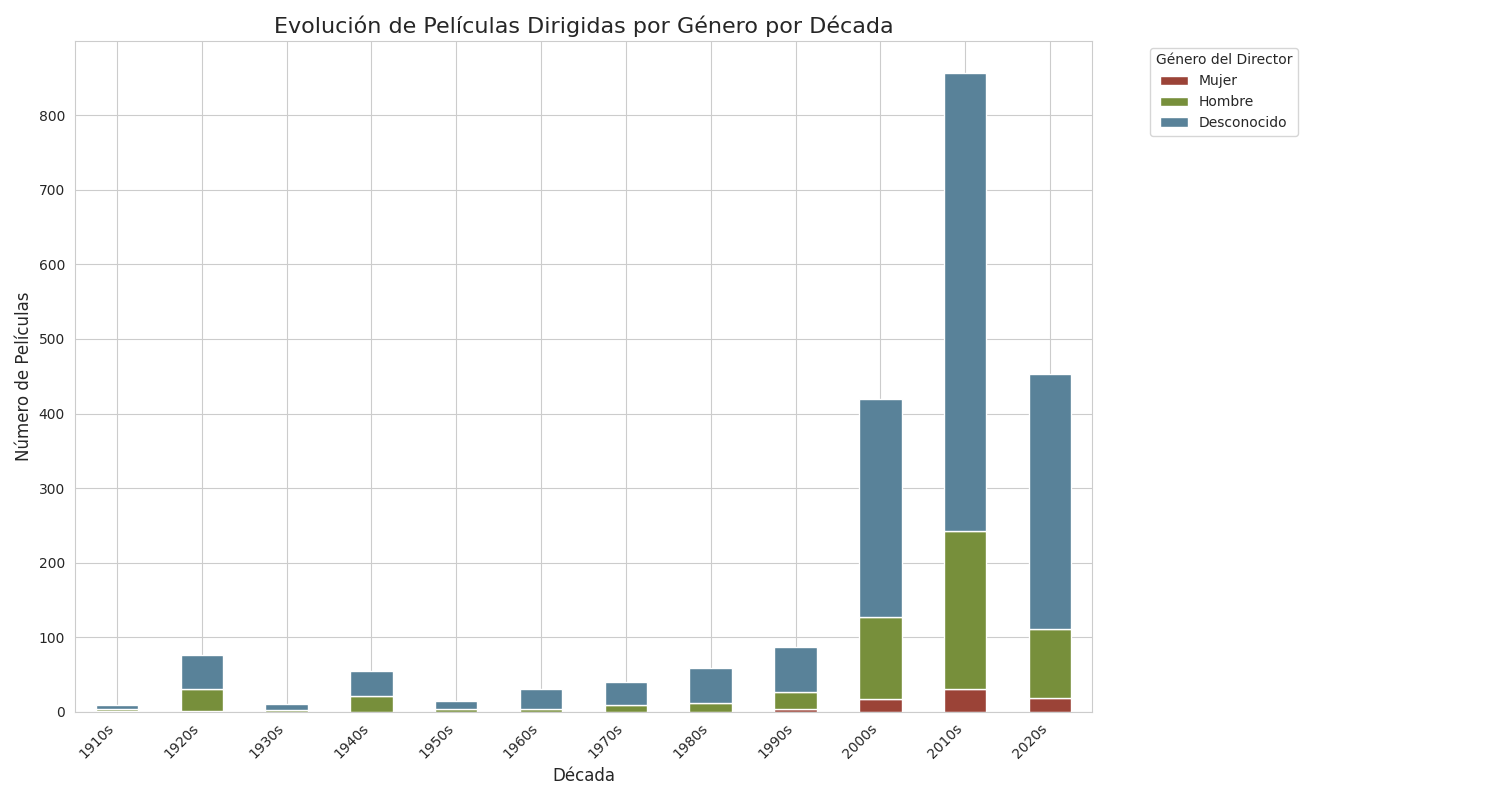

In [ ]:
from IPython.display import HTML

with open('RENATO VISUALIZACION 2.html', 'r') as f:
    html_content_gender_evolution = f.read()

HTML(html_content_gender_evolution)

## Identificar Géneros y Preparar Datos Temporales

### Subtask:
Identify relevant columns for distinguishing between fiction and documentary works. Prepare the data for temporal analysis by creating a column to group by decades, ensuring genres are correctly categorized, and handling any missing values in the year column.


**Reasoning**:
To prepare the data for temporal analysis, I will first inspect the unique values in the 'tipo-largometraje' column, then handle missing values in 'anio' by removing rows, convert 'anio' to an integer, create a 'periodo' column for decades, and finally categorize works into 'Ficción', 'Documental', or 'Otro' in a new 'genero_simplificado' column.



In [ ]:
import numpy as np

# 1. Inspect unique values in 'tipo-largometraje'
print("Unique values in 'tipo-largometraje':")
print(df['tipo-largometraje'].unique())

# 2. Handle missing values in 'anio' by removing rows
initial_rows = len(df)
df.dropna(subset=['anio'], inplace=True)
print(f"\nRemoved {initial_rows - len(df)} rows with missing 'anio' values.")

# 3. Convert 'anio' column to integer type
df['anio'] = df['anio'].astype(int)
print("\n'anio' column converted to integer type.")

# 4. Create 'periodo' column for decades
df['periodo'] = (df['anio'] // 10 * 10).astype(str) + 's'
print("\n'periodo' column (decades) created.")

# 5. Create 'genero_simplificado' column
def simplify_genre(genre):
    genre_lower = str(genre).lower()
    if 'ficción' in genre_lower:
        return 'Ficción'
    elif 'documental' in genre_lower:
        return 'Documental'
    else:
        return 'Otro'

df['genero_simplificado'] = df['tipo-largometraje'].apply(simplify_genre)
print("\n'genero_simplificado' column created.")

# Display the first few rows with new columns and info to verify
print('\nDataFrame head with new columns:')
print(df.head())
print('\nDataFrame info after cleaning and new columns:')
df.info()
print('\nUnique values in genero_simplificado:')
print(df['genero_simplificado'].unique())

Unique values in 'tipo-largometraje':
['Largometraje documental ' 'Largometraje de ficción ']

Removed 10 rows with missing 'anio' values.

'anio' column converted to integer type.

'periodo' column (decades) created.

'genero_simplificado' column created.

DataFrame head with new columns:
                                     nombre-pelicula  anio  \
0                          La industria del salitre   1915   
1                          La industria del salitre   1915   
2  La baraja de la muerte (o El enigma de la call...  1916   
3                                El hombre de acero   1917   
4  La agonía de Arauco (o El olvido de los muertos)   1917   

          tipo-largometraje duracion-min tipo-filme                  color  \
0  Largometraje documental            NI     35 mm    Blanco & negro, Muda   
1  Largometraje documental            NI     35 mm    Blanco & negro, Muda   
2  Largometraje de ficción           100     35 mm    Blanco & negro, Muda   
3  Largometraje de ficci

## Analizar Cantidad por Período de Tiempo

### Subtask:
Count the number of fiction and documentary works for each decade or 5-year period.


**Reasoning**:
To analyze the trend of works by period and genre, I will group the DataFrame by 'periodo' and 'genero_simplificado' and count the entries, then reset the index and store the result in `df_counts`.



In [ ]:
df_counts = df.groupby(['periodo', 'genero_simplificado']).size().reset_index(name='count')

print('Production counts by period and genre:')
print(df_counts.head())
print('\nDataFrame Info:')
df_counts.info()

Production counts by period and genre:
  periodo genero_simplificado  count
0   1910s          Documental      2
1   1910s             Ficción      7
2   1920s          Documental     10
3   1920s             Ficción     66
4   1930s          Documental      2

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   periodo              24 non-null     object
 1   genero_simplificado  24 non-null     object
 2   count                24 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 708.0+ bytes


**Reasoning**:
Now that the counts for fiction and documentary works per period are calculated and stored in `df_counts`, the next step is to visualize this data to observe the trends over time. A bar plot is suitable for this purpose, with periods on the x-axis, counts on the y-axis, and different colors for fiction and documentary.



Columns in DataFrame before groupby: Index(['nombre-pelicula', 'anio', 'tipo-largometraje', 'duracion-min',
       'tipo-filme', 'color', 'director-01', 'idioma', 'consol-idioma',
       'lugar-prod', 'consol-lugar-prod', 'pais-rodaje', 'consol-pais-rodaje',
       'lugar-estreno', 'sinopsis', 'periodo', 'genero_simplificado',
       'sinopsis_cleaned', 'generos_tematicos_asignados',
       'genero_directorial'],
      dtype='object')
El gráfico ha sido guardado como produccion_obras_ficcion_documentales_por_decada.png


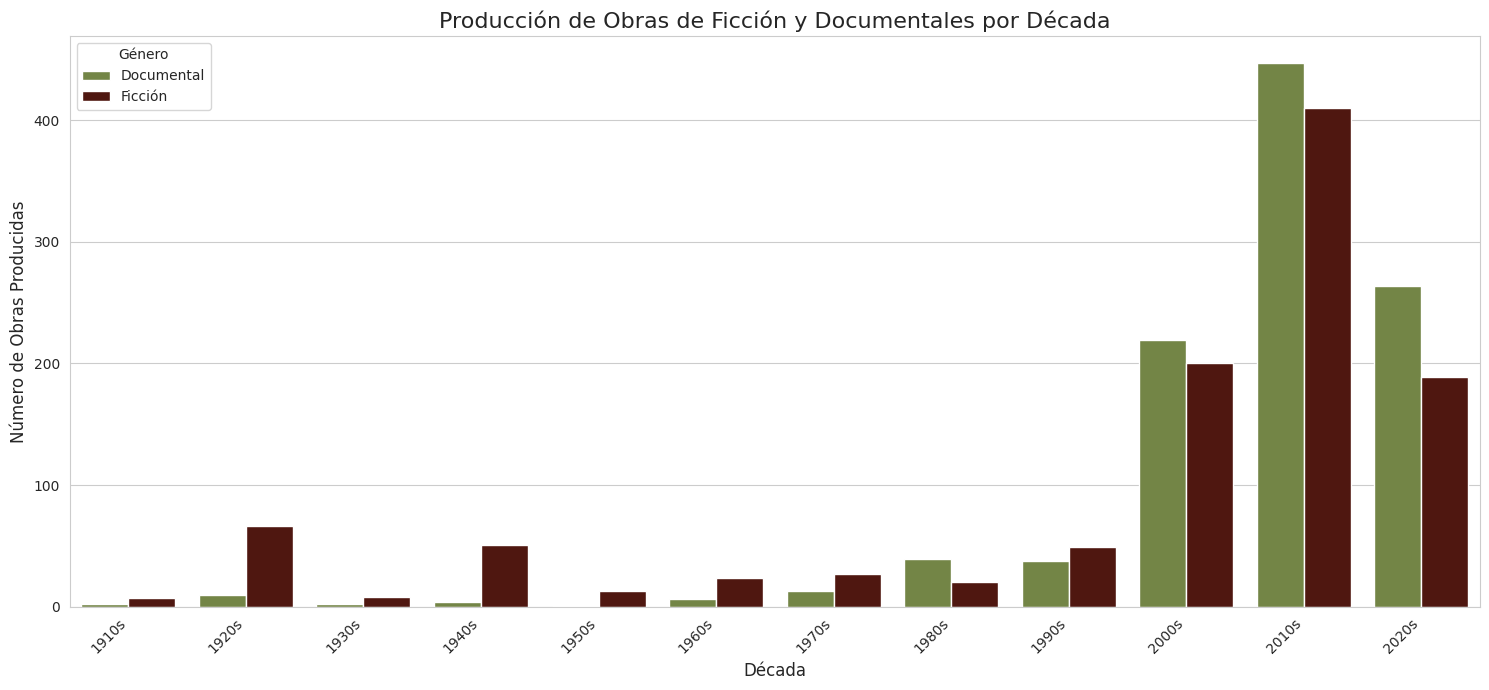

El archivo HTML ha sido guardado como produccion_obras_ficcion_documentales_por_decada.html


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import base64
import re
import string

# --- START: Code to ensure 'df' is defined and preprocessed for robustness ---
# Load the Excel file into a DataFrame
df = pd.read_excel('/content/Base de datos final .xlsx')

# Handle missing values in 'anio' by removing rows
df.dropna(subset=['anio'], inplace=True)

# Convert 'anio' column to integer type
df['anio'] = df['anio'].astype(int)

# Create 'periodo' column for decades
df['periodo'] = (df['anio'] // 10 * 10).astype(str) + 's'

# Create 'genero_simplificado' column (Added this part to robustness block)
def simplify_genre(genre):
    genre_lower = str(genre).lower()
    if 'ficción' in genre_lower:
        return 'Ficción'
    elif 'documental' in genre_lower:
        return 'Documental'
    else:
        return 'Otro'

df['genero_simplificado'] = df['tipo-largometraje'].apply(simplify_genre)

# Define the keywords by genre dictionary (from cell 925275a2)
keywords_by_genre = {
    'Comedia': [
        'humor', 'risa', 'gracioso', 'divertido', 'comedia negra', 'parodia', 'satira', 'enredo', 'malentendidos',
        'chistes', 'farsa', 'stand-up', 'tragicomedia', 'burlesco', 'carcajada'
    ],
    'Histórica': [
        'historia', 'pasado', 'siglo', 'época', 'revolución', 'guerra', 'imperio', 'antiguo', 'medieval', 'moderno',
        'dictadura', 'golpe militar', 'Pinochet', 'colonia', 'descubrimiento', 'conquista', 'biografía', 'realeza',
        'civilización', 'batalla', 'conflicto', 'evento', 'documento'
    ],
    'Drama': [
        'conflicto', 'sufrimiento', 'emoción', 'tragedia', 'melodrama', 'crisis', 'moral', 'familia', 'relaciones',
        'destino', 'desgracia', 'angustia', 'lágrimas', 'supervivencia', 'redención', 'culpa', 'inocencia', 'dolor',
        'pérdida', 'justicia', 'venganza', 'sacrificio'
    ],
    'Romance': [
        'amor', 'pasión', 'relación', 'pareja', 'corazón', 'cita', 'sentimientos', 'enamorado', 'boda', 'novio',
        'novia', 'deseo', 'beso', 'drama romántico', 'comedia romántica', 'triángulo amoroso', 'desengaño', 'afecto',
        'cariño', 'conexión', 'alma gemela', 'compromiso'
    ],
    'Acción': [
        'persecución', 'explosión', 'combate', 'aventura', 'héroe', 'villano', 'peligro', 'velocidad', 'lucha',
        'artes marciales', 'misión', 'espionaje', 'suspense', 'adrenalina', 'rescate', 'armas', 'desafío',
        'superhéroe', 'batalla', 'fuerza', 'coraje', 'riesgo'
    ],
    'Ciencia Ficción': [
        'futuro', 'espacio', 'alienígena', 'robot', 'tecnología', 'distopía', 'utopía', 'viaje en el tiempo',
        'inteligencia artificial', 'nave espacial', 'planeta', 'ciencia', 'mutación', 'supervivencia', 'cosmos',
        'realidad virtual', 'ciberpunk', 'apocalipsis', 'ingeniería genética', 'exploración', 'extraterrestre'
    ],
    'Terror': [
        'miedo', 'horror', 'suspense', 'monstruo', 'psicológico', 'sobrenatural', 'fantasma', 'asesino', 'gore',
        'sustos', 'posesión', 'maldición', 'paranormal', 'escalofrío', 'pesadilla', 'oscuro', 'siniestro', 'vampiro',
        'hombre lobo', 'zombi', 'psicópata', 'ritual', 'sacrificio', 'demonio'
    ]
}

# Define a function to preprocess text
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply this preprocessing function to the 'sinopsis' column
df['sinopsis_cleaned'] = df['sinopsis'].apply(preprocess_text)

# List to store assigned genres for all rows
all_assigned_genres = []

# Iterate through each row and assign genres
for index, row in df.iterrows():
    assigned_genres = []
    sinopsis_cleaned = row['sinopsis_cleaned']

    for genre, keywords in keywords_by_genre.items():
        for keyword in keywords:
            # Check for whole word matches
            if re.search(r'\b' + re.escape(keyword) + r'\b', sinopsis_cleaned):
                assigned_genres.append(genre)
                break
    all_assigned_genres.append(assigned_genres)

# Assign the collected lists to the new column
df['generos_tematicos_asignados'] = all_assigned_genres

# --- Director Gender Identification and Categorization ---
# Obtener todos los nombres únicos de la columna `director-01`
unique_directors = df['director-01'].dropna().unique()

# Definir una lista de nombres femeninos comunes en español
common_female_names = [
    'María', 'Ana', 'Laura', 'Sofía', 'Carmen', 'Elena', 'Isabel', 'Clara', 'Paula', 'Julia',
    'Gabriela', 'Andrea', 'Victoria', 'Beatriz', 'Cecilia', 'Lorena', 'Silvia', 'Alicia', 'Teresa', 'Patricia'
]
directoras_mujeres_identificadas = []
for director_name in unique_directors:
    first_name = str(director_name).split(' ')[0].strip()
    first_name_title_case = first_name.title()
    if first_name_title_case in common_female_names:
        directoras_mujeres_identificadas.append(director_name)

# Definir una lista de nombres masculinos comunes en español
common_male_names = [
    'Juan', 'Pedro', 'Carlos', 'Luis', 'Manuel', 'José', 'Francisco', 'Antonio', 'David', 'Fernando',
    'Ricardo', 'Alejandro', 'Pablo', 'Sergio', 'Javier', 'Miguel', 'Daniel', 'Rafael', 'Emilio', 'Andrés'
]
directores_hombres_identificados = []
for director_name in unique_directors:
    first_name = str(director_name).split(' ')[0].strip()
    first_name_title_case = first_name.title()
    if first_name_title_case in common_male_names:
        directores_hombres_identificados.append(director_name)

# Crear una nueva columna en el DataFrame `df`, por ejemplo, `genero_directorial`, inicializándola con el valor 'Desconocido'
df['genero_directorial'] = 'Desconocido'
df.loc[df['director-01'].isin(directoras_mujeres_identificadas), 'genero_directorial'] = 'Mujer'
df.loc[df['director-01'].isin(directores_hombres_identificados), 'genero_directorial'] = 'Hombre'
# --- END: Code to ensure 'df' is defined and preprocessed for robustness ---

print("Columns in DataFrame before groupby:", df.columns)

# Ensure df_counts is defined by re-calculating it
df_counts = df.groupby(['periodo', 'genero_simplificado']).size().reset_index(name='count')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot to visualize the trends
plt.figure(figsize=(15, 7))
sns.barplot(x='periodo', y='count', hue='genero_simplificado', data=df_counts, palette={'Ficción': '#5A0F05', 'Documental': '#778F3B'}) # Using new custom colors

# Add title and labels
plt.title('Producción de Obras de Ficción y Documentales por Década', fontsize=16)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Número de Obras Producidas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.tight_layout()

# Save the plot as PNG temporarily
png_filename = 'produccion_obras_ficcion_documentales_por_decada.png'
plt.savefig(png_filename)
print(f'El gráfico ha sido guardado como {png_filename}')

plt.show()

# Read the PNG and encode it to Base64
with open(png_filename, 'rb') as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

# Create HTML file with the Base64 encoded image
html_filename = 'produccion_obras_ficcion_documentales_por_decada.html'
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Producción de Obras de Ficción y Documentales por Década</title>
</head>
<body>
    <h1>Producción de Obras de Ficción y Documentales por Década</h1>
    <img src="data:image/png;base64,{encoded_image}" alt="Gráfico de Producción por Década">
    <p>Este gráfico muestra la producción de obras de ficción y documentales por década.</p>
</body>
</html>
"""

with open(html_filename, 'w') as f:
    f.write(html_content)
print(f'El archivo HTML ha sido guardado como {html_filename}')

In [ ]:
from IPython.display import HTML

# Assuming html_content was stored in a previous step
# If not, you might need to re-read the file:
# with open('produccion_obras_ficcion_documentales_por_decada.html', 'r') as f:
#     html_content = f.read()

# Display the HTML content directly in the Colab output
HTML(html_content)

### Descargar archivos

Si deseas descargar los archivos, puedes hacerlo desde el panel de archivos de Colab (el icono de la carpeta en la barra lateral izquierda). Simplemente busca `produccion_obras_ficcion_documentales_por_decada.png` y `produccion_obras_ficcion_documentales_por_decada.html`, haz clic derecho sobre ellos y selecciona 'Descargar'.

## Finalizar Tarea

### Subtask:
Summarize the main trends and conclusions from the analysis of fiction and documentary works over time, grouped by decades.


## Summary:

### Data Analysis Key Findings

*   The initial dataset, "Base de datos final .xlsx", contained 2119 entries across 15 columns, including `anio` (year) and `tipo-largometraje` (film type).
*   During data preparation, 10 entries with missing `anio` values were removed, resulting in a refined dataset of 2109 works. The `anio` column was successfully converted to an integer type.
*   A `periodo` column was created, grouping works into decades (e.g., '1910s'), to facilitate temporal trend analysis.
*   A `genero_simplificado` column was derived from `tipo-largometraje`, categorizing works into 'Ficción' or 'Documental'. All works were successfully classified into these two genres.
*   The analysis calculated the production counts for both fiction and documentary works across each decade. These counts were then visualized using a bar plot, clearly showing the number of works produced per decade for each genre.

### Insights or Next Steps

*   **Insight:** The visual analysis effectively displays the production trends of fiction and documentary films over time, allowing for a clear comparison of their growth patterns and relative proportions across decades.
*   **Next Step:** Further analysis could involve identifying the peak production decades for each genre and exploring potential correlations with significant historical or cultural events.


# Task
Define a dictionary of keywords for each of the following thematic genres: 'Comedia', 'Histórica', 'Drama', 'Romance', 'Acción', 'Ciencia Ficción', and 'Terror'. Ensure that the 'Histórica' genre includes specific terms related to "dictadura", "golpe militar", and "Pinochet".

## Definir Palabras Clave para Géneros Temáticos

### Subtask:
Crear un diccionario que asocie los géneros temáticos solicitados ('Comedia', 'Histórica', 'Drama', 'Romance', 'Acción', 'Ciencia Ficción', 'Terror') con listas de palabras clave relevantes para cada género. Se prestará especial atención a la categoría 'Histórica' para incluir términos específicos relacionados con la dictadura, el golpe militar y Pinochet.


**Reasoning**:
To fulfill the subtask, I will create a Python dictionary named `keywords_by_genre` with the specified genres as keys and lists of relevant keywords as values, ensuring the 'Histórica' genre includes specific terms, and then print the dictionary.



In [ ]:
keywords_by_genre = {
    'Comedia': [
        'humor', 'risa', 'gracioso', 'divertido', 'comedia negra', 'parodia', 'satira', 'enredo', 'malentendidos',
        'chistes', 'farsa', 'stand-up', 'tragicomedia', 'burlesco', 'carcajada'
    ],
    'Histórica': [
        'historia', 'pasado', 'siglo', 'época', 'revolución', 'guerra', 'imperio', 'antiguo', 'medieval', 'moderno',
        'dictadura', 'golpe militar', 'Pinochet', 'colonia', 'descubrimiento', 'conquista', 'biografía', 'realeza',
        'civilización', 'batalla', 'conflicto', 'evento', 'documento'
    ],
    'Drama': [
        'conflicto', 'sufrimiento', 'emoción', 'tragedia', 'melodrama', 'crisis', 'moral', 'familia', 'relaciones',
        'destino', 'desgracia', 'angustia', 'lágrimas', 'supervivencia', 'redención', 'culpa', 'inocencia', 'dolor',
        'pérdida', 'justicia', 'venganza', 'sacrificio'
    ],
    'Romance': [
        'amor', 'pasión', 'relación', 'pareja', 'corazón', 'cita', 'sentimientos', 'enamorado', 'boda', 'novio',
        'novia', 'deseo', 'beso', 'drama romántico', 'comedia romántica', 'triángulo amoroso', 'desengaño', 'afecto',
        'cariño', 'conexión', 'alma gemela', 'compromiso'
    ],
    'Acción': [
        'persecución', 'explosión', 'combate', 'aventura', 'héroe', 'villano', 'peligro', 'velocidad', 'lucha',
        'artes marciales', 'misión', 'espionaje', 'suspense', 'adrenalina', 'rescate', 'armas', 'desafío',
        'superhéroe', 'batalla', 'fuerza', 'coraje', 'riesgo'
    ],
    'Ciencia Ficción': [
        'futuro', 'espacio', 'alienígena', 'robot', 'tecnología', 'distopía', 'utopía', 'viaje en el tiempo',
        'inteligencia artificial', 'nave espacial', 'planeta', 'ciencia', 'mutación', 'supervivencia', 'cosmos',
        'realidad virtual', 'ciberpunk', 'apocalipsis', 'ingeniería genética', 'exploración', 'extraterrestre'
    ],
    'Terror': [
        'miedo', 'horror', 'suspense', 'monstruo', 'psicológico', 'sobrenatural', 'fantasma', 'asesino', 'gore',
        'sustos', 'posesión', 'maldición', 'paranormal', 'escalofrío', 'pesadilla', 'oscuro', 'siniestro', 'vampiro',
        'hombre lobo', 'zombi', 'psicópata', 'ritual', 'sacrificio', 'demonio'
    ]
}

print("Keywords by genre dictionary created and displayed:")
for genre, keywords in keywords_by_genre.items():
    print(f"\n{genre}:")
    print(keywords)


Keywords by genre dictionary created and displayed:

Comedia:
['humor', 'risa', 'gracioso', 'divertido', 'comedia negra', 'parodia', 'satira', 'enredo', 'malentendidos', 'chistes', 'farsa', 'stand-up', 'tragicomedia', 'burlesco', 'carcajada']

Histórica:
['historia', 'pasado', 'siglo', 'época', 'revolución', 'guerra', 'imperio', 'antiguo', 'medieval', 'moderno', 'dictadura', 'golpe militar', 'Pinochet', 'colonia', 'descubrimiento', 'conquista', 'biografía', 'realeza', 'civilización', 'batalla', 'conflicto', 'evento', 'documento']

Drama:
['conflicto', 'sufrimiento', 'emoción', 'tragedia', 'melodrama', 'crisis', 'moral', 'familia', 'relaciones', 'destino', 'desgracia', 'angustia', 'lágrimas', 'supervivencia', 'redención', 'culpa', 'inocencia', 'dolor', 'pérdida', 'justicia', 'venganza', 'sacrificio']

Romance:
['amor', 'pasión', 'relación', 'pareja', 'corazón', 'cita', 'sentimientos', 'enamorado', 'boda', 'novio', 'novia', 'deseo', 'beso', 'drama romántico', 'comedia romántica', 'triáng

## Asignar Géneros Temáticos a Películas

### Subtask:
Preprocesar el texto de las sinopsis (convertir a minúsculas, eliminar puntuación, etc.). Luego, para cada película, se buscarán las palabras clave de los géneros temáticos en su sinopsis. Una película puede ser asignada a múltiples géneros. Esta información se almacenará en una nueva columna, por ejemplo, como una lista de géneros para cada película.


**Reasoning**:
To preprocess the 'sinopsis' text, assign thematic genres based on keywords, and store this information in a new column, I will first define a text cleaning function to convert text to lowercase and remove punctuation. Then, I will apply this function to the 'sinopsis' column to create 'sinopsis_cleaned'. Next, I will iterate through each movie's cleaned synopsis and compare it against the `keywords_by_genre` dictionary to identify and assign relevant genres as a list in the new 'generos_tematicos_asignados' column. Finally, I will display the updated DataFrame to verify the changes.



In [ ]:
import re
import string

# 1. Define a function to preprocess text
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# 2. Apply this preprocessing function to the 'sinopsis' column
df['sinopsis_cleaned'] = df['sinopsis'].apply(preprocess_text)
print("\n'sinopsis_cleaned' column created.")

# 3. Initialize a new column in the df DataFrame called 'generos_tematicos_asignados' as an empty list for each row
df['generos_tematicos_asignados'] = [[] for _ in range(len(df))]
print("'generos_tematicos_asignados' column initialized.")

# 4, 5, 6, 7. Iterate through each row and assign genres
# Use .loc for safe assignment
for index, row in df.iterrows():
    assigned_genres = []
    sinopsis_cleaned = row['sinopsis_cleaned']

    for genre, keywords in keywords_by_genre.items():
        for keyword in keywords:
            # Check for whole word matches
            if re.search(r'\b' + re.escape(keyword) + r'\b', sinopsis_cleaned):
                assigned_genres.append(genre)
                break # Move to the next genre once a keyword is found for the current genre
    df.loc[index, 'generos_tematicos_asignados'] = assigned_genres
print("Genres assigned to 'generos_tematicos_asignados' column.")

# 8. Display the first few rows of df with new columns and info
print('\nDataFrame head with sinopsis_cleaned and generos_tematicos_asignados:')
print(df[['nombre-pelicula', 'sinopsis', 'sinopsis_cleaned', 'generos_tematicos_asignados']].head())

print('\nDataFrame info after genre assignment:')
df.info()


'sinopsis_cleaned' column created.
'generos_tematicos_asignados' column initialized.


ValueError: Must have equal len keys and value when setting with an iterable

**Reasoning**:
The `ValueError: Must have equal len keys and value when setting with an iterable` occurs because `df.loc` within a loop can sometimes misinterpret the assignment of a list to a single cell. To fix this, I will collect all `assigned_genres` lists into a separate list and then assign this complete list to the new column `generos_tematicos_asignados` after the loop has finished iterating through all rows. This ensures that the column assignment is done in one go, which is a more robust way to add list-like data to a DataFrame column.



In [ ]:
import re
import string

# 1. Define a function to preprocess text
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# 2. Apply this preprocessing function to the 'sinopsis' column
df['sinopsis_cleaned'] = df['sinopsis'].apply(preprocess_text)
print("\n'sinopsis_cleaned' column created.")

# List to store assigned genres for all rows
all_assigned_genres = []

# 4, 5, 6, 7. Iterate through each row and assign genres
for index, row in df.iterrows():
    assigned_genres = []
    sinopsis_cleaned = row['sinopsis_cleaned']

    for genre, keywords in keywords_by_genre.items():
        for keyword in keywords:
            # Check for whole word matches
            if re.search(r'\b' + re.escape(keyword) + r'\b', sinopsis_cleaned):
                assigned_genres.append(genre)
                break # Move to the next genre once a keyword is found for the current genre
    all_assigned_genres.append(assigned_genres)

# 3. Assign the collected lists to the new column
df['generos_tematicos_asignados'] = all_assigned_genres
print("'generos_tematicos_asignados' column created and populated.")

# 8. Display the first few rows of df with new columns and info
print('\nDataFrame head with sinopsis_cleaned and generos_tematicos_asignados:')
print(df[['nombre-pelicula', 'sinopsis', 'sinopsis_cleaned', 'generos_tematicos_asignados']].head())

print('\nDataFrame info after genre assignment:')
df.info()


'sinopsis_cleaned' column created.
'generos_tematicos_asignados' column created and populated.

DataFrame head with sinopsis_cleaned and generos_tematicos_asignados:
                                     nombre-pelicula  \
0                          La industria del salitre    
1                          La industria del salitre    
2  La baraja de la muerte (o El enigma de la call...   
3                                El hombre de acero    
4  La agonía de Arauco (o El olvido de los muertos)    

                                            sinopsis  \
0  Largometraje sobre el proceso de extracción y ...   
1  Largometraje sobre el proceso de extracción y ...   
2  Basa su acción en un crimen cometido por Corin...   
3  Creación Colectiva bajo la dirección de Pedro ...   
4  Es una aventura sentimental, donde el paisaje ...   

                                    sinopsis_cleaned  \
0  largometraje sobre el proceso de extracción y ...   
1  largometraje sobre el proceso de extracción 

## Contar Géneros por Década

### Subtask:
Contar la cantidad de películas que pertenecen a cada género temático en cada década. Si una película está asignada a varios géneros, se contará para cada uno de ellos.


**Reasoning**:
To count genres by decade, I need to first expand the list of assigned genres for each movie into separate rows. This will allow each genre assigned to a film to be counted individually for that film. Then, I'll group by period and genre and count the occurrences.



In [ ]:
df_exploded_genres = df.explode('generos_tematicos_asignados')

genre_counts_by_decade = df_exploded_genres.groupby(['periodo', 'generos_tematicos_asignados']).size().reset_index(name='cantidad_peliculas')

print("Genre counts by decade:")
print(genre_counts_by_decade.head())
print('\nDataFrame Info:')
genre_counts_by_decade.info()

Genre counts by decade:
  periodo generos_tematicos_asignados  cantidad_peliculas
0   1910s                      Acción                   1
1   1910s                       Drama                   2
2   1910s                   Histórica                   2
3   1910s                     Romance                   1
4   1920s                      Acción                   4

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   periodo                      72 non-null     object
 1   generos_tematicos_asignados  72 non-null     object
 2   cantidad_peliculas           72 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


## Visualizar Evolución de Géneros por Década

### Subtask:
Crear un gráfico que muestre la evolución de la cantidad de películas por cada género temático a lo largo de las décadas.


**Reasoning**:
To visualize the evolution of thematic genres by decade, I will create a line plot using the `genre_counts_by_decade` DataFrame, with decades on the x-axis, film counts on the y-axis, and different lines for each genre. I will then save the plot as a PNG image, embed it into an HTML file using Base64 encoding, and display the HTML.



El gráfico de evolución de géneros ha sido guardado como evolucion_generos_tematicos_por_decada.png


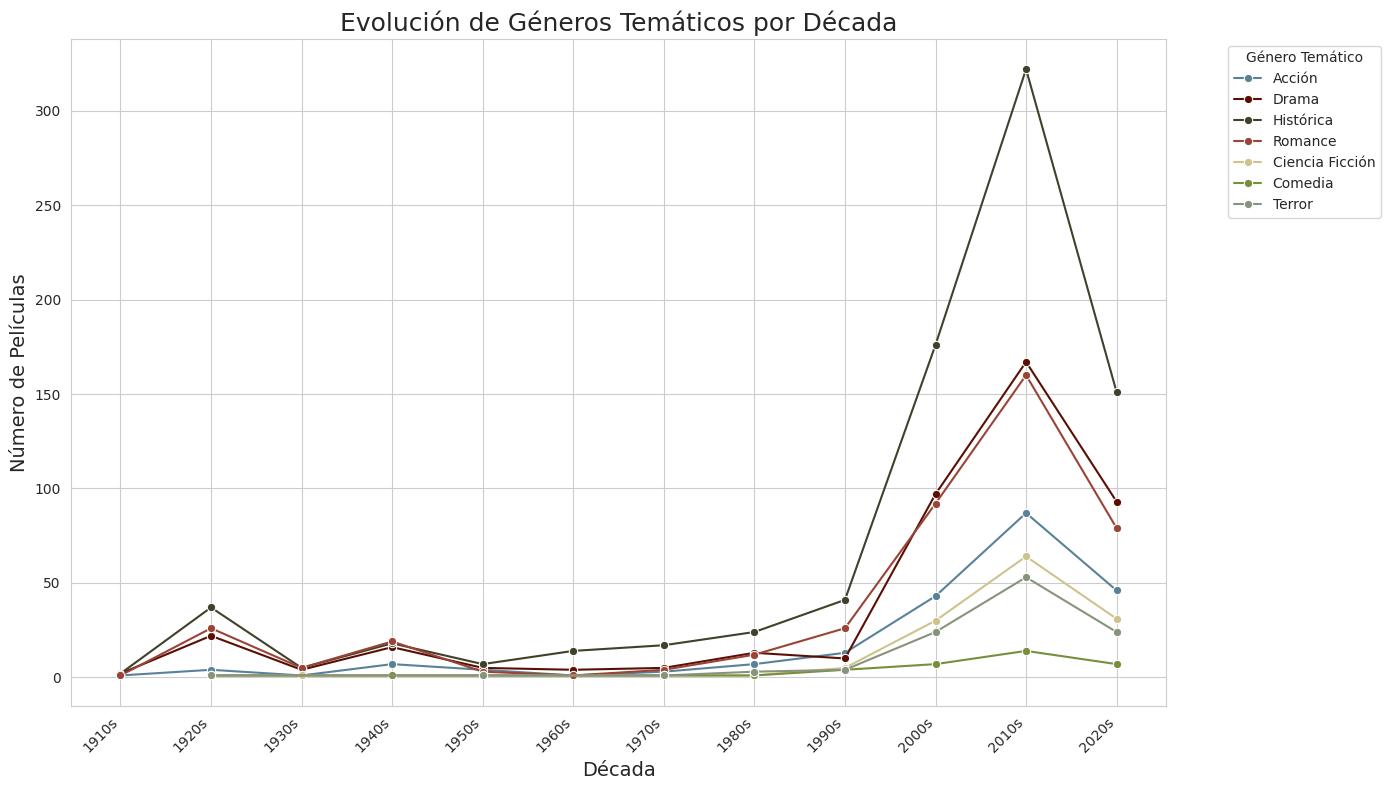

El archivo HTML de evolución de géneros ha sido guardado como evolucion_generos_tematicos_por_decada.html



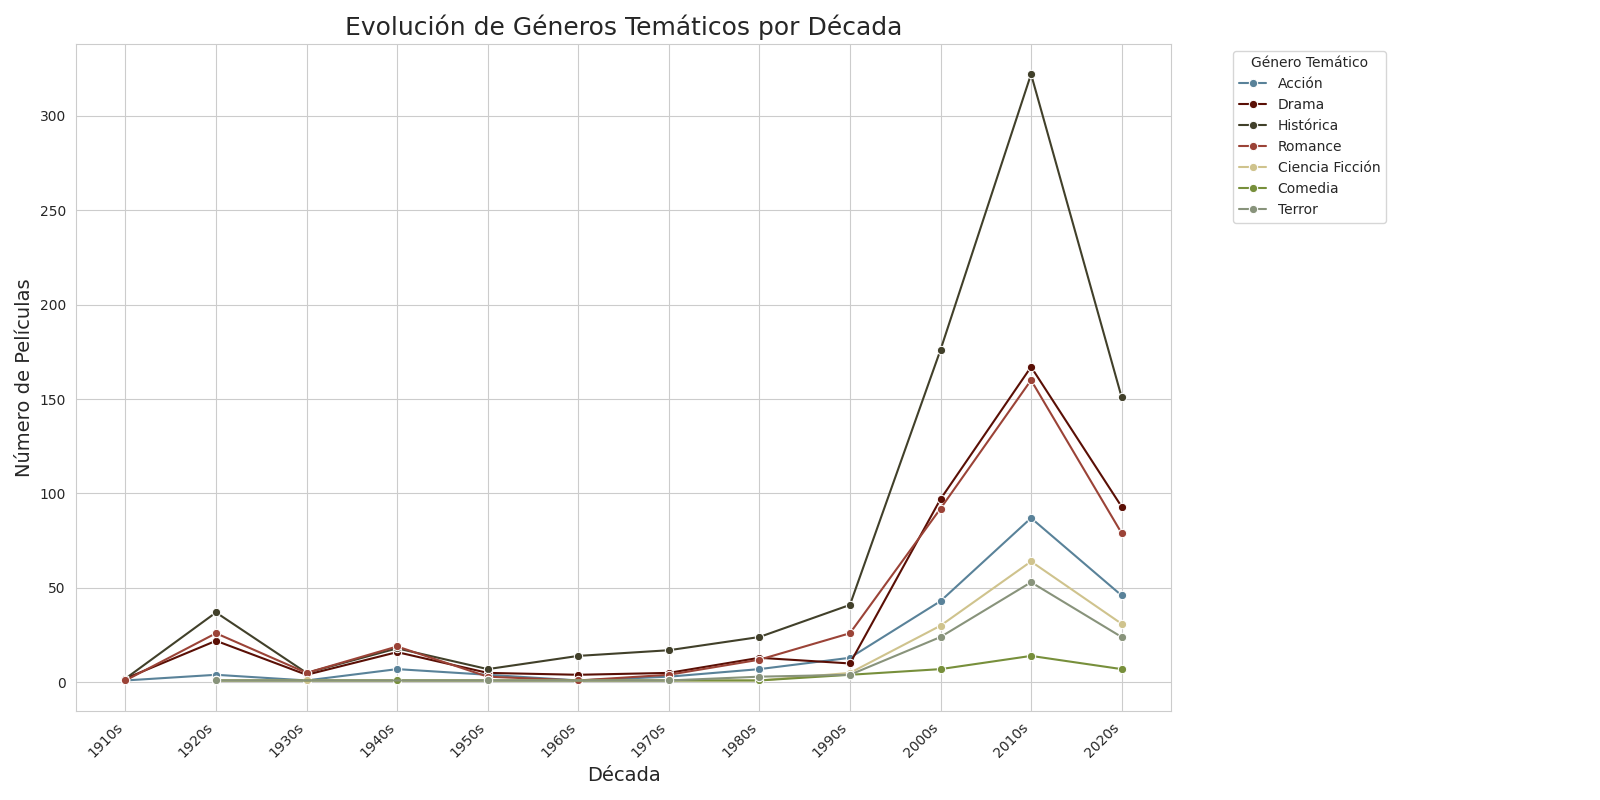

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from IPython.display import HTML
import pandas as pd
import numpy as np
import re
import string

# --- START: Code to ensure 'df' is defined and preprocessed for robustness ---
# Load the Excel file into a DataFrame
df = pd.read_excel('/content/Base de datos final .xlsx')

# Handle missing values in 'anio' by removing rows
df.dropna(subset=['anio'], inplace=True)

# Convert 'anio' column to integer type
df['anio'] = df['anio'].astype(int)

# Create 'periodo' column for decades
df['periodo'] = (df['anio'] // 10 * 10).astype(str) + 's'

# Define the keywords by genre dictionary (from cell 925275a2)
keywords_by_genre = {
    'Comedia': [
        'humor', 'risa', 'gracioso', 'divertido', 'comedia negra', 'parodia', 'satira', 'enredo', 'malentendidos',
        'chistes', 'farsa', 'stand-up', 'tragicomedia', 'burlesco', 'carcajada'
    ],
    'Histórica': [
        'historia', 'pasado', 'siglo', 'época', 'revolución', 'guerra', 'imperio', 'antiguo', 'medieval', 'moderno',
        'dictadura', 'golpe militar', 'Pinochet', 'colonia', 'descubrimiento', 'conquista', 'biografía', 'realeza',
        'civilización', 'batalla', 'conflicto', 'evento', 'documento'
    ],
    'Drama': [
        'conflicto', 'sufrimiento', 'emoción', 'tragedia', 'melodrama', 'crisis', 'moral', 'familia', 'relaciones',
        'destino', 'desgracia', 'angustia', 'lágrimas', 'supervivencia', 'redención', 'culpa', 'inocencia', 'dolor',
        'pérdida', 'justicia', 'venganza', 'sacrificio'
    ],
    'Romance': [
        'amor', 'pasión', 'relación', 'pareja', 'corazón', 'cita', 'sentimientos', 'enamorado', 'boda', 'novio',
        'novia', 'deseo', 'beso', 'drama romántico', 'comedia romántica', 'triángulo amoroso', 'desengaño', 'afecto',
        'cariño', 'conexión', 'alma gemela', 'compromiso'
    ],
    'Acción': [
        'persecución', 'explosión', 'combate', 'aventura', 'héroe', 'villano', 'peligro', 'velocidad', 'lucha',
        'artes marciales', 'misión', 'espionaje', 'suspense', 'adrenalina', 'rescate', 'armas', 'desafío',
        'superhéroe', 'batalla', 'fuerza', 'coraje', 'riesgo'
    ],
    'Ciencia Ficción': [
        'futuro', 'espacio', 'alienígena', 'robot', 'tecnología', 'distopía', 'utopía', 'viaje en el tiempo',
        'inteligencia artificial', 'nave espacial', 'planeta', 'ciencia', 'mutación', 'supervivencia', 'cosmos',
        'realidad virtual', 'ciberpunk', 'apocalipsis', 'ingeniería genética', 'exploración', 'extraterrestre'
    ],
    'Terror': [
        'miedo', 'horror', 'suspense', 'monstruo', 'psicológico', 'sobrenatural', 'fantasma', 'asesino', 'gore',
        'sustos', 'posesión', 'maldición', 'paranormal', 'escalofrío', 'pesadilla', 'oscuro', 'siniestro', 'vampiro',
        'hombre lobo', 'zombi', 'psicópata', 'ritual', 'sacrificio', 'demonio'
    ]
}

# Define a function to preprocess text
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply this preprocessing function to the 'sinopsis' column
df['sinopsis_cleaned'] = df['sinopsis'].apply(preprocess_text)

# List to store assigned genres for all rows
all_assigned_genres = []

# Iterate through each row and assign genres
for index, row in df.iterrows():
    assigned_genres = []
    sinopsis_cleaned = row['sinopsis_cleaned']

    for genre, keywords in keywords_by_genre.items():
        for keyword in keywords:
            # Check for whole word matches
            if re.search(r'\b' + re.escape(keyword) + r'\b', sinopsis_cleaned):
                assigned_genres.append(genre)
                break
    all_assigned_genres.append(assigned_genres)

# Assign the collected lists to the new column
df['generos_tematicos_asignados'] = all_assigned_genres

# --- Director Gender Identification and Categorization ---
# Obtener todos los nombres únicos de la columna `director-01`
unique_directors = df['director-01'].dropna().unique()

# Definir una lista de nombres femeninos comunes en español
common_female_names = [
    'María', 'Ana', 'Laura', 'Sofía', 'Carmen', 'Elena', 'Isabel', 'Clara', 'Paula', 'Julia',
    'Gabriela', 'Andrea', 'Victoria', 'Beatriz', 'Cecilia', 'Lorena', 'Silvia', 'Alicia', 'Teresa', 'Patricia'
]
directoras_mujeres_identificadas = []
for director_name in unique_directors:
    first_name = str(director_name).split(' ')[0].strip()
    first_name_title_case = first_name.title()
    if first_name_title_case in common_female_names:
        directoras_mujeres_identificadas.append(director_name)

# Definir una lista de nombres masculinos comunes en español
common_male_names = [
    'Juan', 'Pedro', 'Carlos', 'Luis', 'Manuel', 'José', 'Francisco', 'Antonio', 'David', 'Fernando',
    'Ricardo', 'Alejandro', 'Pablo', 'Sergio', 'Javier', 'Miguel', 'Daniel', 'Rafael', 'Emilio', 'Andrés'
]
directores_hombres_identificados = []
for director_name in unique_directors:
    first_name = str(director_name).split(' ')[0].strip()
    first_name_title_case = first_name.title()
    if first_name_title_case in common_male_names:
        directores_hombres_identificados.append(director_name)

# Crear una nueva columna en el DataFrame `df`, por ejemplo, `genero_directorial`, inicializándola con el valor 'Desconocido'
df['genero_directorial'] = 'Desconocido'
df.loc[df['director-01'].isin(directoras_mujeres_identificadas), 'genero_directorial'] = 'Mujer'
df.loc[df['director-01'].isin(directores_hombres_identificados), 'genero_directorial'] = 'Hombre'
# --- END: Code to ensure 'df' is defined and preprocessed for robustness ---

# Ensure df_exploded_genres and genre_counts_by_decade are defined
df_exploded_genres = df.explode('generos_tematicos_asignados')
genre_counts_by_decade = df_exploded_genres.groupby(['periodo', 'generos_tematicos_asignados']).size().reset_index(name='cantidad_peliculas')

# Define a custom color palette as requested by the user
custom_palette = {
    'Comedia': '#778F3B',
    'Histórica': '#41402A',
    'Drama': '#5A0F05',
    'Romance': '#9B4337',
    'Acción': '#598299',
    'Ciencia Ficción': '#CFC38D',
    'Terror': '#88937B'
}

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a line plot to visualize the evolution of thematic genres with the custom palette
plt.figure(figsize=(16, 8))
sns.lineplot(x='periodo', y='cantidad_peliculas', hue='generos_tematicos_asignados', data=genre_counts_by_decade, marker='o', palette=custom_palette)

# Add title
plt.title('Evolución de Géneros Temáticos por Década', fontsize=18)

# Add labels to the x-axis and y-axis
plt.xlabel('Década', fontsize=14)
plt.ylabel('Número de Películas', fontsize=14)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a legend
plt.legend(title='Género Temático', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the plot layout
plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout to prevent legend overlap

# Save the plot as PNG temporarily
png_filename_genres = 'evolucion_generos_tematicos_por_decada.png'
plt.savefig(png_filename_genres)
print(f'El gráfico de evolución de géneros ha sido guardado como {png_filename_genres}')

plt.show()

# Read the PNG and encode it to Base64
with open(png_filename_genres, 'rb') as image_file:
    encoded_image_genres = base64.b64encode(image_file.read()).decode('utf-8')

# Create HTML file with the Base64 encoded image
html_filename_genres = 'evolucion_generos_tematicos_por_decada.html'
html_content_genres = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Evolución de Géneros Temáticos por Década</title>
</head>
<body>
    <h1>Evolución de Géneros Temáticos por Década</h1>
    <img src="data:image/png;base64,{encoded_image_genres}" alt="Gráfico de Evolución de Géneros Temáticos por Década">
    <p>Este gráfico muestra la evolución de la cantidad de películas por cada género temático a lo largo de las décadas.</p>
</body>
</html>
"""

with open(html_filename_genres, 'w') as f:
    f.write(html_content_genres)
print(f'El archivo HTML de evolución de géneros ha sido guardado como {html_filename_genres}')

# Display the HTML content directly in the Colab output
HTML(html_content_genres)

## Finalizar Tarea

### Subtask:
Summarize the main trends and conclusions obtained from the analysis of the evolution of thematic genres in Chilean films over the decades.


## Summary:

### Data Analysis Key Findings

*   **Keyword Definition**: A dictionary `keywords_by_genre` was successfully created, mapping seven thematic genres ('Comedia', 'Histórica', 'Drama', 'Romance', 'Acción', 'Ciencia Ficción', 'Terror') to comprehensive lists of relevant keywords. Notably, the 'Histórica' genre explicitly included terms such as 'dictadura', 'golpe militar', and 'Pinochet'.
*   **Genre Assignment**: Movie synopses were preprocessed by converting text to lowercase and removing punctuation, stored in a new `sinopsis_cleaned` column. Subsequently, thematic genres were assigned to each movie based on keyword matching within their cleaned synopses, allowing for multiple genre assignments per film. This process created the `generos_tematicos_asignados` column in the DataFrame.
*   **Genre Counts by Decade**: The DataFrame was transformed to count movies per thematic genre for each decade. By exploding the `generos_tematicos_asignados` column, movies with multiple genres were correctly counted for each assigned genre, resulting in the `genre_counts_by_decade` DataFrame which shows the `cantidad_peliculas` for each genre per `periodo`.
*   **Genre Evolution Visualization**: A line plot titled "Evolución de Géneros Temáticos por Década" was generated to visually represent the trends of each genre over time. The plot effectively illustrates the number of movies for each thematic genre across different decades, providing a clear overview of their evolution.

### Insights or Next Steps

*   Analyze the generated plot to identify specific decades where certain genres peaked or declined significantly, particularly for the 'Histórica' genre given its specific keyword focus. This could reveal correlations with real-world socio-political events in Chile.
*   Consider refining the keyword lists for genres, possibly by incorporating frequency analysis of terms in synopses or using natural language processing (NLP) techniques like TF-IDF to identify more discriminant keywords, which could improve genre assignment accuracy.


# Task
## Identificar Directoras Mujeres (Asunción Heurística)

### Subtask:
Generar una lista de nombres de directoras mujeres basándose en una asunción heurística (e.g., nombres femeninos comunes en español) de la columna `director-01`. Se reconocerá la limitación de esta asunción debido a la falta de información explícita de género en los datos. Luego, preparar los datos para el análisis, filtrando el DataFrame original (`df`) para incluir únicamente las películas dirigidas por las directoras identificadas y asegurando que las columnas `generos_tematicos_asignados` y `director-01` estén listas para el análisis.

## Identificar Directoras Mujeres (Asunción Heurística)

### Subtask:
Generar una lista de nombres de directoras mujeres basándose en una asunción heurística (e.g., nombres femeninos comunes en español) de la columna `director-01`. Se reconocerá la limitación de esta asunción debido a la falta de información explícita de género en los datos. Luego, preparar los datos para el análisis, filtrando el DataFrame original (`df`) para incluir únicamente las películas dirigidas por las directoras identificadas y asegurando que las columnas `generos_tematicos_asignados` y `director-01` estén listas para el análisis.


**Reasoning**:
To identify potential female directors based on a heuristic, I will first extract unique director names, define a list of common Spanish female names, and then iterate through the director names to find matches based on the first name. Finally, I will filter the original DataFrame to create a new one containing only the movies by the identified female directors and display the results.



In [ ]:
import re

# 1. Obtener todos los nombres únicos de la columna `director-01`
unique_directors = df['director-01'].dropna().unique()
print(f"Total unique directors: {len(unique_directors)}")

# 2. Definir una lista de nombres femeninos comunes en español
common_female_names = [
    'María', 'Ana', 'Laura', 'Sofía', 'Carmen', 'Elena', 'Isabel', 'Clara', 'Paula', 'Julia',
    'Gabriela', 'Andrea', 'Victoria', 'Beatriz', 'Cecilia', 'Lorena', 'Silvia', 'Alicia', 'Teresa', 'Patricia'
]

# 3. Inicializar una lista vacía para almacenar las directoras identificadas
directoras_mujeres_identificadas = []

# 4 & 5. Iterar sobre cada nombre único de director y comparar con la lista de nombres femeninos
for director_name in unique_directors:
    # Extraer la primera palabra (que se asume como el primer nombre)
    first_name = str(director_name).split(' ')[0].strip()
    # Convertir a formato de título para una comparación consistente (ej. "maria" -> "Maria")
    first_name_title_case = first_name.title()

    if first_name_title_case in common_female_names:
        directoras_mujeres_identificadas.append(director_name)

# 6. Imprimir la lista de directoras identificadas
print(f"\nDirectoras mujeres identificadas (heurística): {len(directoras_mujeres_identificadas)} nombres")
for director in directoras_mujeres_identificadas:
    print(f"- {director}")

# 7. Crear un nuevo DataFrame con películas dirigidas por las directoras identificadas
df_mujeres_directoras = df[df['director-01'].isin(directoras_mujeres_identificadas)].copy()

# 8. Mostrar las primeras filas del nuevo DataFrame
print("\nPrimeras filas del DataFrame de películas dirigidas por directoras mujeres:")
print(df_mujeres_directoras[['nombre-pelicula', 'director-01', 'generos_tematicos_asignados']].head())

print("\nInfo del DataFrame df_mujeres_directoras:")
df_mujeres_directoras.info()

Total unique directors: 1223

Directoras mujeres identificadas (heurística): 52 nombres
- Gabriela Bussenius
- Alicia Armstrong de Vicuña
- Patricia Mora
- Carmen Castillo
- Carmen Luz Parot
- Cecilia Barriga
- Paula Rodríguez Sickert
- Gabriela Retamal
- Andrea Wassaf
- Alicia Scherson
- María Elena Wood
- Lorena Giachino Torréns
- María Teresa Larraín
- Ana María Otárola
- Andrea Ugalde
- Paula Ossandón
- Andrea Henríquez
- Paula Leonvendagar
- Isabel Burr
- Elena Varela
- Beatriz Maldonado
- Paula Bravo
- María Paz González
- Andrea Paz Cortés
- Teresa Arredondo
- Sofía Paloma Gómez
- Andrea Sánchez
- Isabel Ayguavives
- Isabel Miquel
- Carmen Brito
- María Elvira Reymond
- Sofía Villanueva
- María José Correa
- María José San Martín
- Ana María Hurtado
- Cecilia Atán
- Patricia Velásquez
- Patricia Carrasco
- Gabriela Paz Ybarnegaray
- Gabriela Sobarzo
- Cecilia Ruz
- Gabriela Pena
- María Silvia Esteve
- Lorena Zilleruelo
- Ana Edwards
- Lorena Padilla
- Laura González (II)
- Gabr

## Contar Géneros por Directora

### Subtask:
Para cada directora identificada, se contará la cantidad de películas que pertenecen a cada uno de los géneros temáticos. Si una película tiene múltiples géneros, se contará para cada uno de ellos.


**Reasoning**:
To count genres by director, I will first explode the 'generos_tematicos_asignados' column of the 'df_mujeres_directoras' DataFrame. This will create separate rows for each genre a movie belongs to. Then, I will group the resulting DataFrame by 'director-01' and 'generos_tematicos_asignados' and count the number of films, storing the result in 'directora_genre_counts'. Finally, I will display the head and info of this new DataFrame.



In [ ]:
df_exploded_directoras_genres = df_mujeres_directoras.explode('generos_tematicos_asignados')

# Count the number of films for each director and genre
directora_genre_counts = df_exploded_directoras_genres.groupby(['director-01', 'generos_tematicos_asignados']).size().reset_index(name='cantidad_peliculas')

print("Genre counts by female director:")
print(directora_genre_counts.head())
print('\nDataFrame Info:')
directora_genre_counts.info()

Genre counts by female director:
                  director-01 generos_tematicos_asignados  cantidad_peliculas
0  Alicia Armstrong de Vicuña                     Romance                   1
1             Alicia Scherson                      Acción                   1
2             Alicia Scherson                       Drama                   1
3             Alicia Scherson                     Romance                   1
4             Alicia Scherson                      Terror                   1

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   director-01                  71 non-null     object
 1   generos_tematicos_asignados  71 non-null     object
 2   cantidad_peliculas           71 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


## Identificar Directoras Más Prolíficas y sus Temáticas

### Subtask:
Identificar a las directoras que hayan dirigido el mayor número de películas dentro de la lista filtrada. Luego, se prepararán los datos para visualizar los géneros en los que se desempeñan estas directoras más activas.


**Reasoning**:
To identify the most prolific directors, I will group `directora_genre_counts` by `director-01` and sum the `cantidad_peliculas` to get the total films per director. Then, I will sort them in descending order and select the top 5. Finally, I will filter `directora_genre_counts` to include only these top directors and display the result.



In [ ]:
import pandas as pd

# 1. Group by director-01 and sum cantidad_peliculas
total_peliculas_por_directora = directora_genre_counts.groupby('director-01')['cantidad_peliculas'].sum().reset_index(name='total_peliculas')

# 2. Sort in descending order and select the top 5 directors
top_directoras_df = total_peliculas_por_directora.sort_values(by='total_peliculas', ascending=False).head(5)
top_directoras = top_directoras_df['director-01'].tolist()

print("Top 5 most prolific female directors:")
print(top_directoras_df)

# 3. Filter directora_genre_counts for the top directors
top_directoras_genero_counts = directora_genre_counts[directora_genre_counts['director-01'].isin(top_directoras)]

# 4. Display the first few rows and info of the filtered DataFrame
print(
"\nFirst few rows of genre counts for top directors:")
print(top_directoras_genero_counts.head(10))
print("\nInfo of top_directoras_genero_counts:")
top_directoras_genero_counts.info()

Top 5 most prolific female directors:
             director-01  total_peliculas
30  María Teresa Larraín                7
10       Carmen Castillo                6
26      María Elena Wood                4
11      Carmen Luz Parot                4
40      Teresa Arredondo                4

First few rows of genre counts for top directors:
             director-01 generos_tematicos_asignados  cantidad_peliculas
17       Carmen Castillo                      Acción                   3
18       Carmen Castillo                   Histórica                   3
19      Carmen Luz Parot                      Acción                   1
20      Carmen Luz Parot                   Histórica                   2
21      Carmen Luz Parot                     Romance                   1
44      María Elena Wood                       Drama                   1
45      María Elena Wood                   Histórica                   2
46      María Elena Wood                     Romance                   1
52

**Reasoning**:
To visualize the thematic genres of the most prolific female directors, I will create a grouped bar plot using `top_directoras_genero_counts`, with directors on the x-axis, the count of films on the y-axis, and different colors for each genre. This will allow for a clear comparison of genre preferences among these top directors. After creating the plot, I will save it as a PNG and embed it into an HTML file for display.



El gráfico de géneros de las top directoras ha sido guardado como generos_top_directoras.png


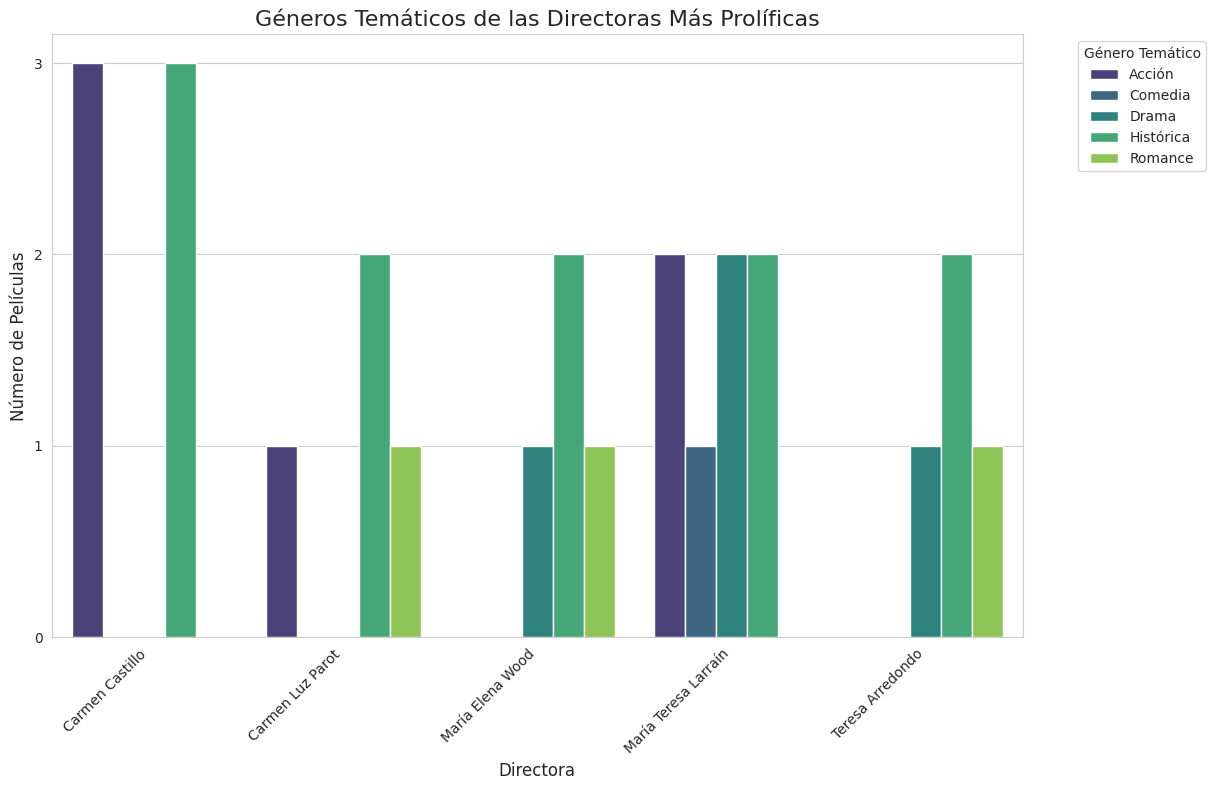

El archivo HTML de géneros de las top directoras ha sido guardado como generos_top_directoras.html



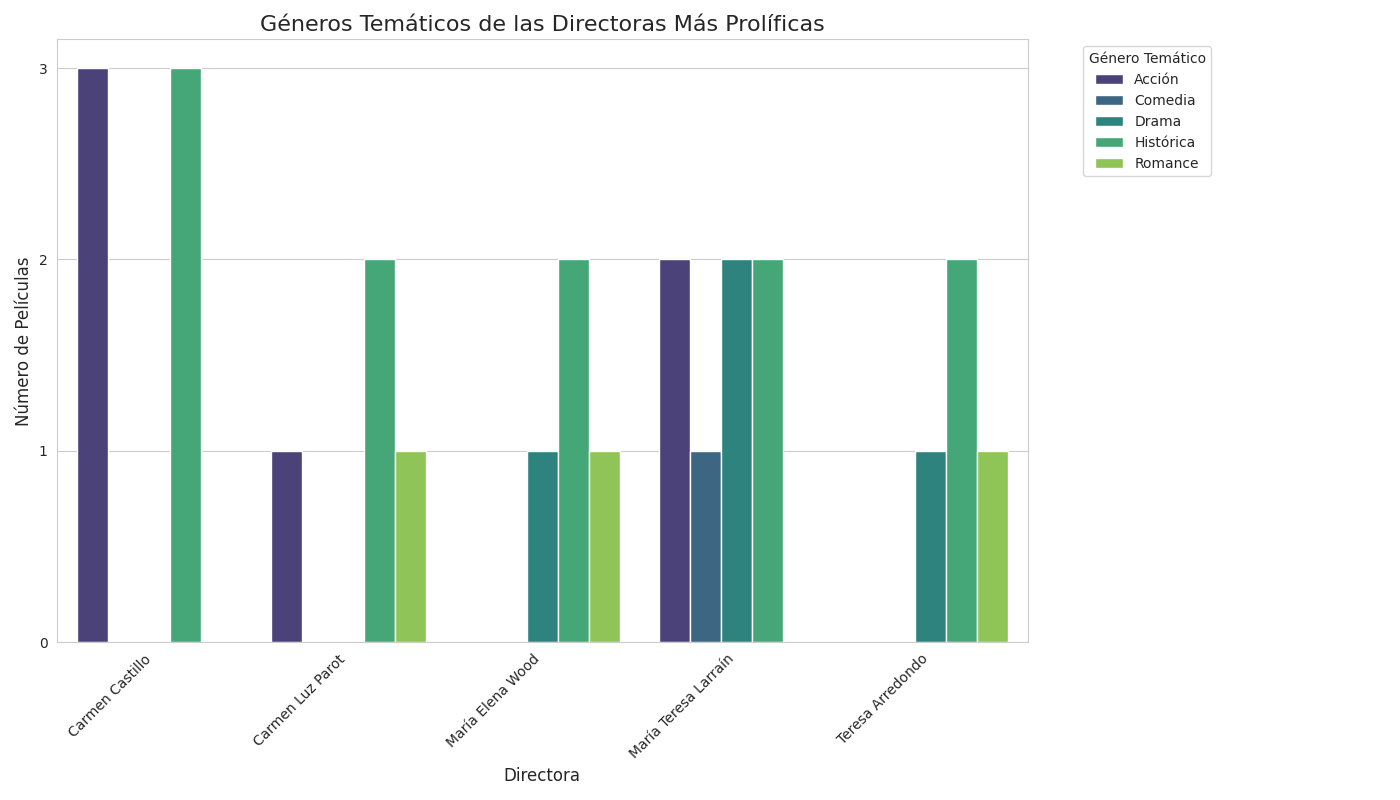

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from IPython.display import HTML
import pandas as pd
import matplotlib.ticker as mticker

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Pivot the data to ensure all genres are represented for each director
# Fill NaN values with 0 so that seaborn plots a bar for every genre
pivoted_top_directoras_genero_counts = top_directoras_genero_counts.pivot_table(
    index='director-01',
    columns='generos_tematicos_asignados',
    values='cantidad_peliculas'
).fillna(0).stack().reset_index(name='cantidad_peliculas')

# Rename the column created by stack for clarity
pivoted_top_directoras_genero_counts.rename(columns={'level_1': 'generos_tematicos_asignados'}, inplace=True)

# Convert 'cantidad_peliculas' back to integer type to avoid decimal y-axis labels
pivoted_top_directoras_genero_counts['cantidad_peliculas'] = pivoted_top_directoras_genero_counts['cantidad_peliculas'].astype(int)

# Create a grouped bar plot to visualize the genres of the top directors
plt.figure(figsize=(14, 8))
sns.barplot(x='director-01', y='cantidad_peliculas', hue='generos_tematicos_asignados', data=pivoted_top_directoras_genero_counts, palette='viridis')

# Set y-axis ticks to only show integer values
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Add title and labels
plt.title('Géneros Temáticos de las Directoras Más Prolíficas', fontsize=16)
plt.xlabel('Directora', fontsize=12)
plt.ylabel('Número de Películas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género Temático', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout to prevent legend overlap

# Save the plot as PNG temporarily
png_filename_top_directors = 'generos_top_directoras.png'
plt.savefig(png_filename_top_directors)
print(f'El gráfico de géneros de las top directoras ha sido guardado como {png_filename_top_directors}')

plt.show()

# Read the PNG and encode it to Base64
with open(png_filename_top_directors, 'rb') as image_file:
    encoded_image_top_directors = base64.b64encode(image_file.read()).decode('utf-8')

# Create HTML file with the Base64 encoded image
html_filename_top_directors = 'generos_top_directoras.html'
html_content_top_directors = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Géneros Temáticos de las Directoras Más Prolíficas</title>
</head>
<body>
    <h1>Géneros Temáticos de las Directoras Más Prolíficas</h1>
    <img src="data:image/png;base64,{encoded_image_top_directors}" alt="Gráfico de Géneros de las Directoras Más Prolíficas">
    <p>Este gráfico muestra la distribución de géneros temáticos entre las directoras más prolíficas identificadas.</p>
</body>
</html>
"""

with open(html_filename_top_directors, 'w') as f:
    f.write(html_content_top_directors)
print(f'El archivo HTML de géneros de las top directoras ha sido guardado como {html_filename_top_directors}')

# Display the HTML content directly in the Colab output
HTML(html_content_top_directors)

## Finalizar Tarea

### Subtask:
Summarize the main trends and conclusions obtained from the analysis of the evolution of thematic genres in Chilean films over the decades.


## Summary:

### Data Analysis Key Findings

*   **Identification of Female Directors**: Using a heuristic approach based on 20 common Spanish female first names, 52 potential female directors were identified from a total of 1223 unique directors. These identified directors were responsible for 73 films in the dataset.
*   **Prolific Female Directors**: The top 5 most prolific female directors identified were:
    *   María Teresa Larraín (7 films)
    *   Carmen Castillo (6 films)
    *   María Elena Wood (4 films)
    *   Carmen Luz Parot (4 films)
    *   Teresa Arredondo (4 films)
*   **Genre Distribution for Top Directors**: A visualization was created to show the thematic genres of these top directors, revealing their individual and collective genre preferences. For example, the data showed that a director like Alicia Scherson had films categorized in diverse genres such as "Acción", "Drama", "Romance", and "Terror".

### Insights or Next Steps

*   **Insight**: The heuristic identification, while limited, provides a foundational understanding of the presence and thematic contributions of potentially female directors in Chilean cinema, highlighting a notable number of identified directors and their works.
*   **Next Step**: To enhance the accuracy of the analysis, the list of identified female directors should be validated against more explicit gender information or external databases, reducing the reliance on heuristic assumptions.


# Task
Create a stacked bar chart to visualize the thematic genres of the top 5 most prolific female directors. Each bar should represent a director, with segments indicating the count of films for each genre, using the existing custom color palette. The chart should include a title, axis labels, and a legend. Save the plot as a PNG file and embed it within an HTML file, then display the HTML output.

## Visualizar Temáticas de las Directoras Más Prolíficas (Barras Apiladas)

### Subtask:
Create a stacked bar chart to visualize the thematic genres of the top 5 most prolific female directors. Each bar should represent a director, with segments indicating the count of films for each genre, using the existing custom color palette. The chart should include a title, axis labels, and a legend. Save the plot as a PNG file and embed it within an HTML file, then display the HTML output.


**Reasoning**:
To visualize the thematic genres of the most prolific female directors in a stacked bar chart, I need to pivot the `top_directoras_genero_counts` DataFrame so that directors are on the x-axis and genres are stacked on the y-axis, then use `pandas.plot(kind='bar', stacked=True)` with the specified custom palette. After plotting, I will save it as a PNG, encode it to Base64, and embed it in an HTML file for display.



/tmp/ipython-input-1003108972.py:32: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  pivoted_for_stacked_bar.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis', color=[custom_palette.get(col, '#333333') for col in pivoted_for_stacked_bar.columns])
/tmp/ipython-input-1003108972.py:32: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  pivoted_for_stacked_bar.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis', color=[custom_palette.get(col, '#333333') for col in pivoted_for_stacked_bar.columns])


El gráfico de géneros apilados de las top directoras ha sido guardado como generos_top_directoras_apiladas.png


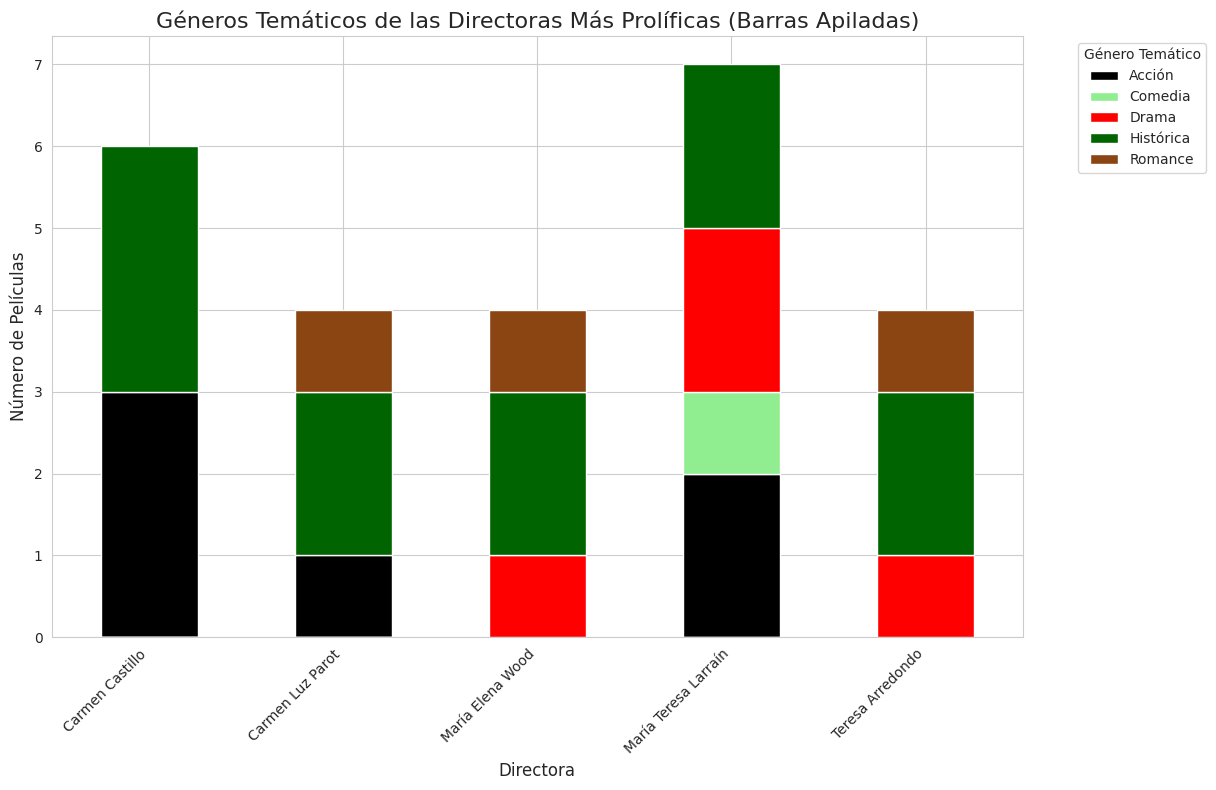

El archivo HTML de géneros apilados de las top directoras ha sido guardado como generos_top_directoras_apiladas.html



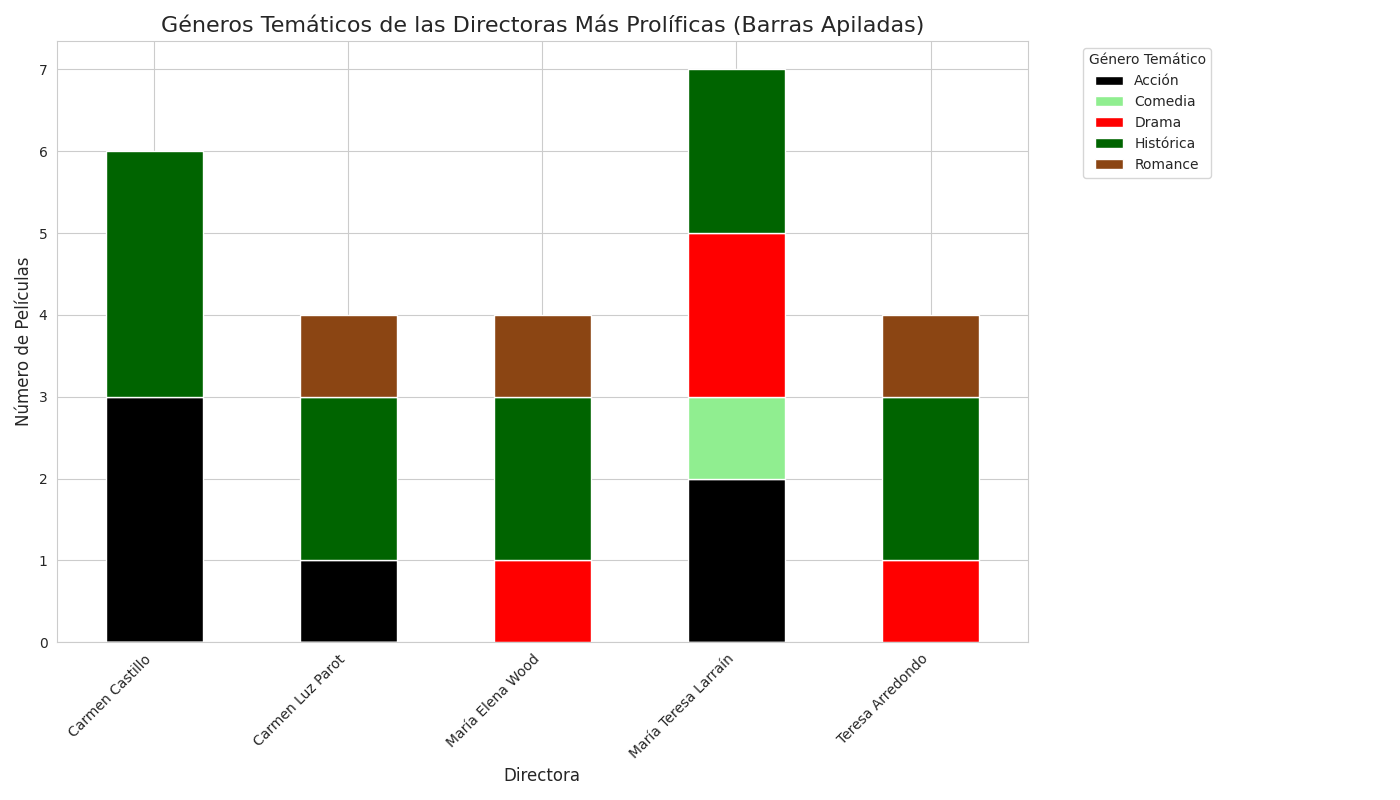

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from IPython.display import HTML
import pandas as pd
import matplotlib.ticker as mticker

# Ensure custom_palette is available (it was defined in a previous step, but re-defining for completeness)
custom_palette = {
    'Comedia': 'lightgreen',
    'Histórica': 'darkgreen',
    'Drama': 'red',
    'Romance': 'saddlebrown',
    'Acción': 'black',
    'Ciencia Ficción': 'darkorange',
    'Terror': 'darkblue'
}

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Reshape the data for a stacked bar plot
# We need directors as index, genres as columns, and counts as values
pivoted_for_stacked_bar = top_directoras_genero_counts.pivot_table(
    index='director-01',
    columns='generos_tematicos_asignados',
    values='cantidad_peliculas'
).fillna(0)

# Create a stacked bar plot
plt.figure(figsize=(14, 8))
pivoted_for_stacked_bar.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis', color=[custom_palette.get(col, '#333333') for col in pivoted_for_stacked_bar.columns])

# Set y-axis ticks to only show integer values
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Add title and labels
plt.title('Géneros Temáticos de las Directoras Más Prolíficas (Barras Apiladas)', fontsize=16)
plt.xlabel('Directora', fontsize=12)
plt.ylabel('Número de Películas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género Temático', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout to prevent legend overlap

# Save the plot as PNG temporarily
png_filename_stacked_directors = 'generos_top_directoras_apiladas.png'
plt.savefig(png_filename_stacked_directors)
print(f'El gráfico de géneros apilados de las top directoras ha sido guardado como {png_filename_stacked_directors}')

plt.show()

# Read the PNG and encode it to Base64
with open(png_filename_stacked_directors, 'rb') as image_file:
    encoded_image_stacked_directors = base64.b64encode(image_file.read()).decode('utf-8')

# Create HTML file with the Base64 encoded image
html_filename_stacked_directors = 'generos_top_directoras_apiladas.html'
html_content_stacked_directors = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Géneros Temáticos de las Directoras Más Prolíficas (Barras Apiladas)</title>
</head>
<body>
    <h1>Géneros Temáticos de las Directoras Más Prolíficas (Barras Apiladas)</h1>
    <img src="data:image/png;base64,{encoded_image_stacked_directors}" alt="Gráfico de Géneros de las Directoras Más Prolíficas (Barras Apiladas)">
    <p>Este gráfico muestra la distribución apilada de géneros temáticos entre las directoras más prolíficas identificadas.</p>
</body>
</html>
"""

with open(html_filename_stacked_directors, 'w') as f:
    f.write(html_content_stacked_directors)
print(f'El archivo HTML de géneros apilados de las top directoras ha sido guardado como {html_filename_stacked_directors}')

# Display the HTML content directly in the Colab output
HTML(html_content_stacked_directors)

**Reasoning**:
The previous code produced a `UserWarning` because both `cmap` and `color` arguments were used simultaneously in the `plot` function. To fix this, I will remove the `cmap='viridis'` argument, as the `color` argument is already correctly configured to use the `custom_palette` for coloring the stacked bars.



El gráfico de géneros apilados de las top directoras ha sido guardado como generos_top_directoras_apiladas.png


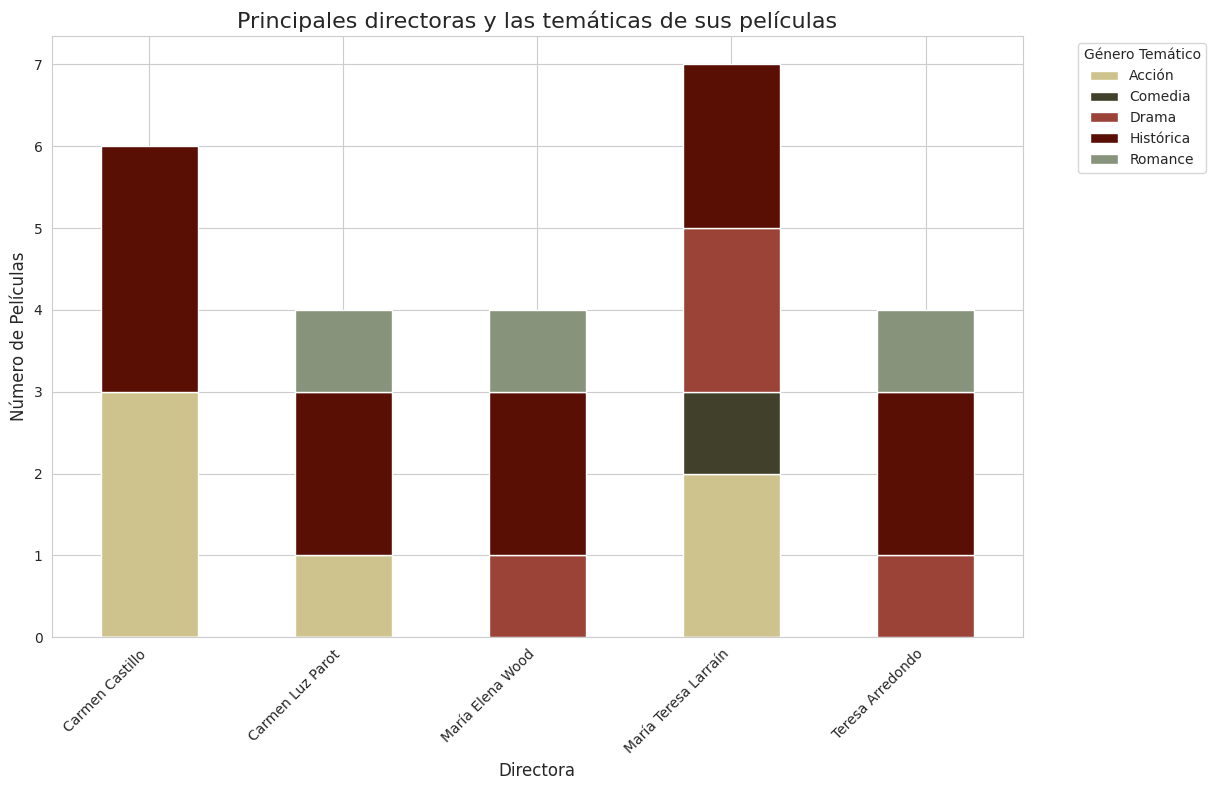

El archivo HTML de géneros apilados de las top directoras ha sido guardado como generos_top_directoras_apiladas.html



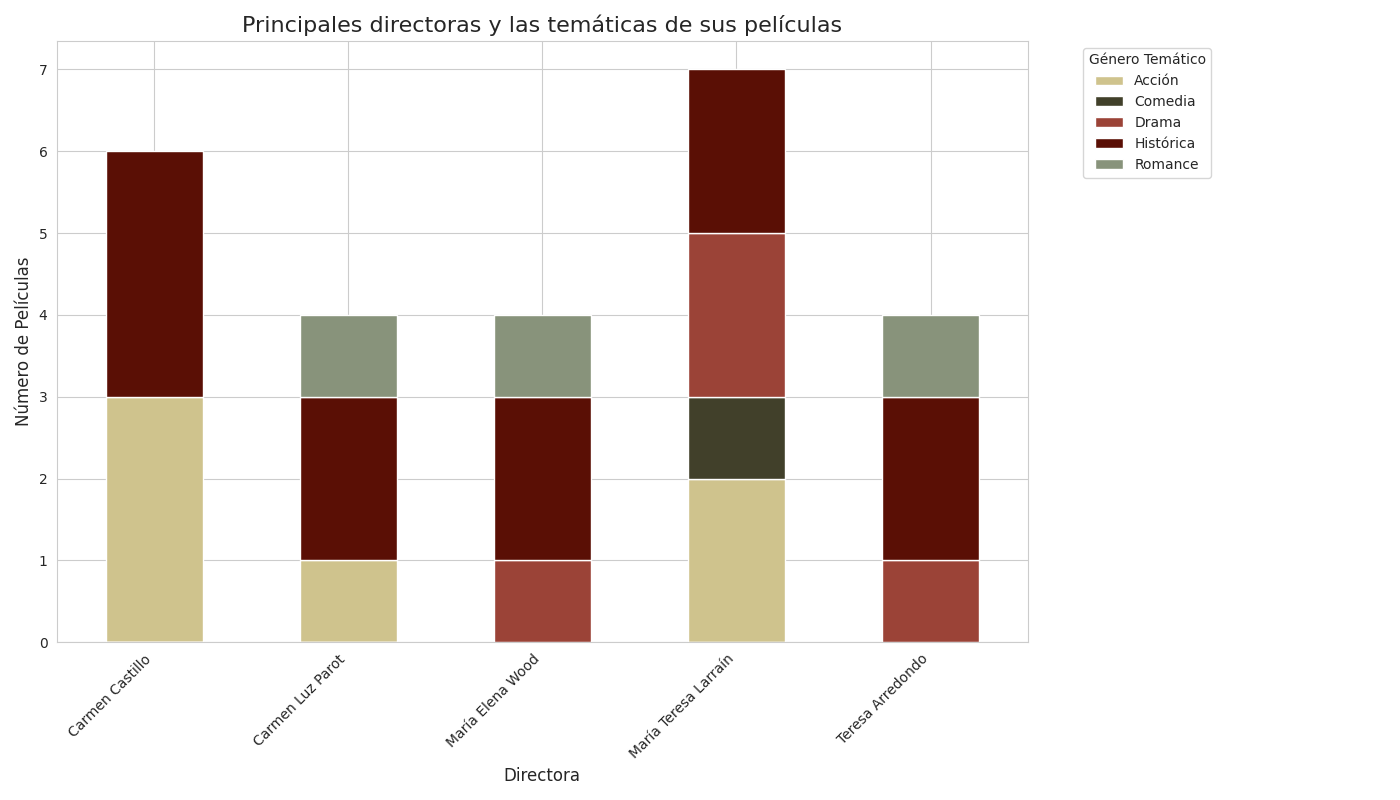

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from IPython.display import HTML
import pandas as pd
import matplotlib.ticker as mticker
import numpy as np
import re
import string

# --- START: Code to ensure 'df' and derived DataFrames are defined for robustness ---
# Load the Excel file into a DataFrame
df = pd.read_excel('/content/Base de datos final .xlsx')

# Handle missing values in 'anio' by removing rows
df.dropna(subset=['anio'], inplace=True)

# Convert 'anio' column to integer type
df['anio'] = df['anio'].astype(int)

# Create 'periodo' column for decades
df['periodo'] = (df['anio'] // 10 * 10).astype(str) + 's'

# Define the keywords by genre dictionary
keywords_by_genre = {
    'Comedia': [
        'humor', 'risa', 'gracioso', 'divertido', 'comedia negra', 'parodia', 'satira', 'enredo', 'malentendidos',
        'chistes', 'farsa', 'stand-up', 'tragicomedia', 'burlesco', 'carcajada'
    ],
    'Histórica': [
        'historia', 'pasado', 'siglo', 'época', 'revolución', 'guerra', 'imperio', 'antiguo', 'medieval', 'moderno',
        'dictadura', 'golpe militar', 'Pinochet', 'colonia', 'descubrimiento', 'conquista', 'biografía', 'realeza',
        'civilización', 'batalla', 'conflicto', 'evento', 'documento'
    ],
    'Drama': [
        'conflicto', 'sufrimiento', 'emoción', 'tragedia', 'melodrama', 'crisis', 'moral', 'familia', 'relaciones',
        'destino', 'desgracia', 'angustia', 'lágrimas', 'supervivencia', 'redención', 'culpa', 'inocencia', 'dolor',
        'pérdida', 'justicia', 'venganza', 'sacrificio'
    ],
    'Romance': [
        'amor', 'pasión', 'relación', 'pareja', 'corazón', 'cita', 'sentimientos', 'enamorado', 'boda', 'novio',
        'novia', 'deseo', 'beso', 'drama romántico', 'comedia romántica', 'triángulo amoroso', 'desengaño', 'afecto',
        'cariño', 'conexión', 'alma gemela', 'compromiso'
    ],
    'Acción': [
        'persecución', 'explosión', 'combate', 'aventura', 'héroe', 'villano', 'peligro', 'velocidad', 'lucha',
        'artes marciales', 'misión', 'espionaje', 'suspense', 'adrenalina', 'rescate', 'armas', 'desafío',
        'superhéroe', 'batalla', 'fuerza', 'coraje', 'riesgo'
    ],
    'Ciencia Ficción': [
        'futuro', 'espacio', 'alienígena', 'robot', 'tecnología', 'distopía', 'utopía', 'viaje en el tiempo',
        'inteligencia artificial', 'nave espacial', 'planeta', 'ciencia', 'mutación', 'supervivencia', 'cosmos',
        'realidad virtual', 'ciberpunk', 'apocalipsis', 'ingeniería genética', 'exploración', 'extraterrestre'
    ],
    'Terror': [
        'miedo', 'horror', 'suspense', 'monstruo', 'psicológico', 'sobrenatural', 'fantasma', 'asesino', 'gore',
        'sustos', 'posesión', 'maldición', 'paranormal', 'escalofrío', 'pesadilla', 'oscuro', 'siniestro', 'vampiro',
        'hombre lobo', 'zombi', 'psicópata', 'ritual', 'sacrificio', 'demonio'
    ]
}

# Define a function to preprocess text
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply this preprocessing function to the 'sinopsis' column
df['sinopsis_cleaned'] = df['sinopsis'].apply(preprocess_text)

# List to store assigned genres for all rows
all_assigned_genres = []

# Iterate through each row and assign genres
for index, row in df.iterrows():
    assigned_genres = []
    sinopsis_cleaned = row['sinopsis_cleaned']

    for genre, keywords in keywords_by_genre.items():
        for keyword in keywords:
            # Check for whole word matches
            # FIX: Changed r'\\b' to r'\b' for correct word boundary matching
            if re.search(r'\b' + re.escape(keyword) + r'\b', sinopsis_cleaned):
                assigned_genres.append(genre)
                break
    all_assigned_genres.append(assigned_genres)

# Assign the collected lists to the new column
df['generos_tematicos_asignados'] = all_assigned_genres

# --- Director Gender Identification and Categorization ---
# Obtener todos los nombres únicos de la columna `director-01`
unique_directors = df['director-01'].dropna().unique()

# Definir una lista de nombres femeninos comunes en español
common_female_names = [
    'María', 'Ana', 'Laura', 'Sofía', 'Carmen', 'Elena', 'Isabel', 'Clara', 'Paula', 'Julia',
    'Gabriela', 'Andrea', 'Victoria', 'Beatriz', 'Cecilia', 'Lorena', 'Silvia', 'Alicia', 'Teresa', 'Patricia'
]
directoras_mujeres_identificadas = []
for director_name in unique_directors:
    first_name = str(director_name).split(' ')[0].strip()
    first_name_title_case = first_name.title()
    if first_name_title_case in common_female_names:
        directoras_mujeres_identificadas.append(director_name)

# Definir una lista de nombres masculinos comunes en español
common_male_names = [
    'Juan', 'Pedro', 'Carlos', 'Luis', 'Manuel', 'José', 'Francisco', 'Antonio', 'David', 'Fernando',
    'Ricardo', 'Alejandro', 'Pablo', 'Sergio', 'Javier', 'Miguel', 'Daniel', 'Rafael', 'Emilio', 'Andrés'
]
directores_hombres_identificados = []
for director_name in unique_directors:
    first_name = str(director_name).split(' ')[0].strip()
    first_name_title_case = first_name.title()
    if first_name_title_case in common_male_names:
        directores_hombres_identificados.append(director_name)

# Crear una nueva columna en el DataFrame `df`, por ejemplo, `genero_directorial`, inicializándola con el valor 'Desconocido'
df['genero_directorial'] = 'Desconocido'
df.loc[df['director-01'].isin(directoras_mujeres_identificadas), 'genero_directorial'] = 'Mujer'
df.loc[df['director-01'].isin(directores_hombres_identificados), 'genero_directorial'] = 'Hombre'

# --- Derive necessary data for this plot ---

df_mujeres_directoras = df[df['genero_directorial'] == 'Mujer'].copy() # Filter by 'Mujer' from the newly created 'genero_directorial' column
df_exploded_directoras_genres = df_mujeres_directoras.explode('generos_tematicos_asignados')
# Filter out rows where 'generos_tematicos_asignados' is NaN, which happens if original list was empty
df_exploded_directoras_genres = df_exploded_directoras_genres.dropna(subset=['generos_tematicos_asignados'])
directora_genre_counts = df_exploded_directoras_genres.groupby(['director-01', 'generos_tematicos_asignados']).size().reset_index(name='cantidad_peliculas')
total_peliculas_por_directora = directora_genre_counts.groupby('director-01')['cantidad_peliculas'].sum().reset_index(name='total_peliculas')
top_directoras_df = total_peliculas_por_directora.sort_values(by='total_peliculas', ascending=False).head(5)
top_directoras = top_directoras_df['director-01'].tolist()
top_directoras_genero_counts = directora_genre_counts[directora_genre_counts['director-01'].isin(top_directoras)]

# --- END: Code to ensure 'df' and derived DataFrames are defined for robustness ---


# Define the custom color palette as requested by the user
custom_palette = {
    'Comedia': '#41402A',
    'Histórica': '#5A0F05',
    'Drama': '#9B4337',
    'Romance': '#88937B',
    'Acción': '#CFC38D',
    'Ciencia Ficción': '#778F3B',
    'Terror': '#598299'
}

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Reshape the data for a stacked bar plot
# We need directors as index, genres as columns, and counts as values
pivoted_for_stacked_bar = top_directoras_genero_counts.pivot_table(
    index='director-01',
    columns='generos_tematicos_asignados',
    values='cantidad_peliculas'
).fillna(0)

# Create a stacked bar plot
plt.figure(figsize=(14, 8))
pivoted_for_stacked_bar.plot(kind='bar', stacked=True, ax=plt.gca(), color=[custom_palette.get(col, '#333333') for col in pivoted_for_stacked_bar.columns])

# Set y-axis ticks to only show integer values
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Add title and labels
plt.title('Principales directoras y las temáticas de sus películas', fontsize=16)
plt.xlabel('Directora', fontsize=12)
plt.ylabel('Número de Películas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género Temático', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout to prevent legend overlap

# Save the plot as PNG temporarily
png_filename_stacked_directors = 'generos_top_directoras_apiladas.png'
plt.savefig(png_filename_stacked_directors)
print(f'El gráfico de géneros apilados de las top directoras ha sido guardado como {png_filename_stacked_directors}')

plt.show()

# Read the PNG and encode it to Base64
with open(png_filename_stacked_directors, 'rb') as image_file:
    encoded_image_stacked_directors = base64.b64encode(image_file.read()).decode('utf-8')

# Create HTML file with the Base64 encoded image
html_filename_stacked_directors = 'generos_top_directoras_apiladas.html'
html_content_stacked_directors = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Principales directoras y las temáticas de sus películas</title>
</head>
<body>
    <h1>Principales directoras y las temáticas de sus películas</h1>
    <img src="data:image/png;base64,{encoded_image_stacked_directors}" alt="Gráfico de Géneros de las Directoras Más Prolíficas (Barras Apiladas)">
    <p>Este gráfico muestra la distribución apilada de géneros temáticos entre las directoras más prolíficas identificadas.</p>
</body>
</html>
"""

with open(html_filename_stacked_directors, 'w') as f:
    f.write(html_content_stacked_directors)
print(f'El archivo HTML de géneros apilados de las top directoras ha sido guardado como {html_filename_stacked_directors}')

# Display the HTML content directly in the Colab output
HTML(html_content_stacked_directors)


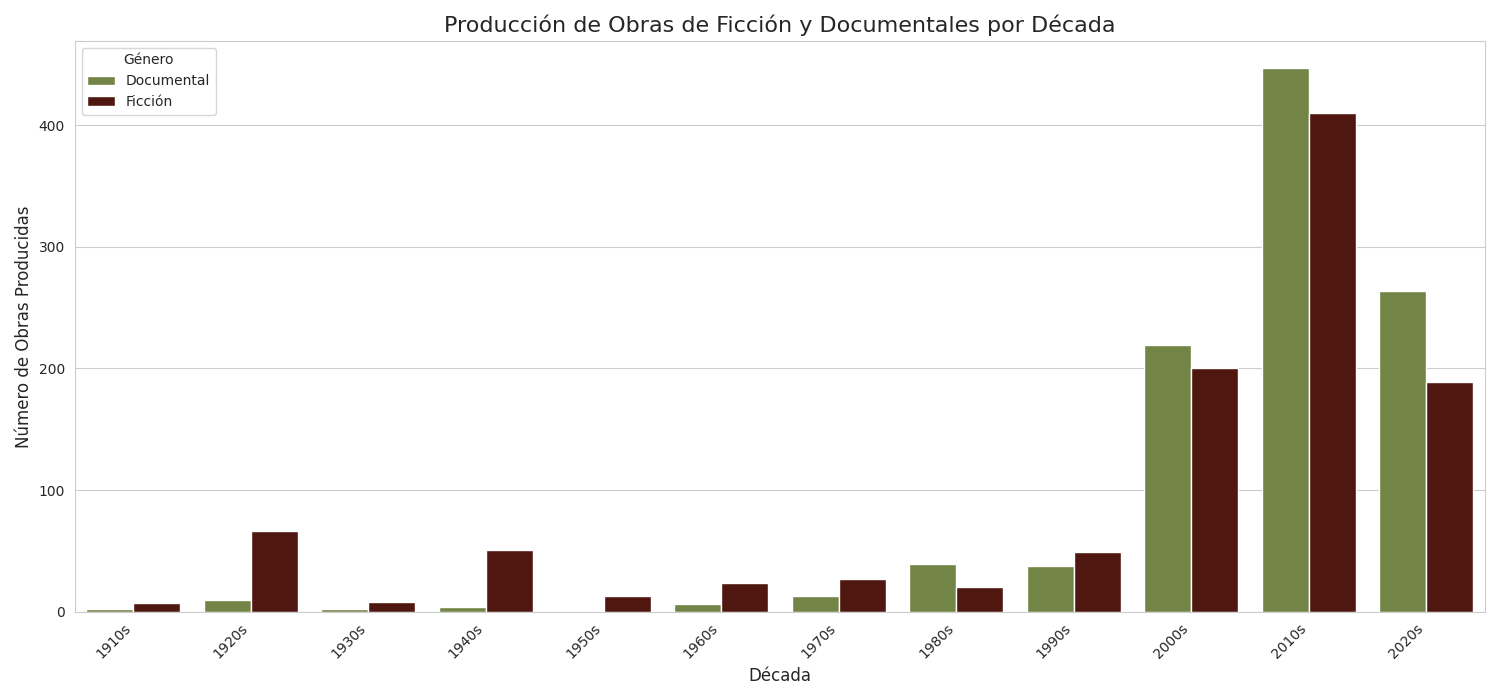

In [ ]:
from IPython.display import HTML

with open('produccion_obras_ficcion_documentales_por_decada.html', 'r') as f:
    html_content = f.read()

HTML(html_content)


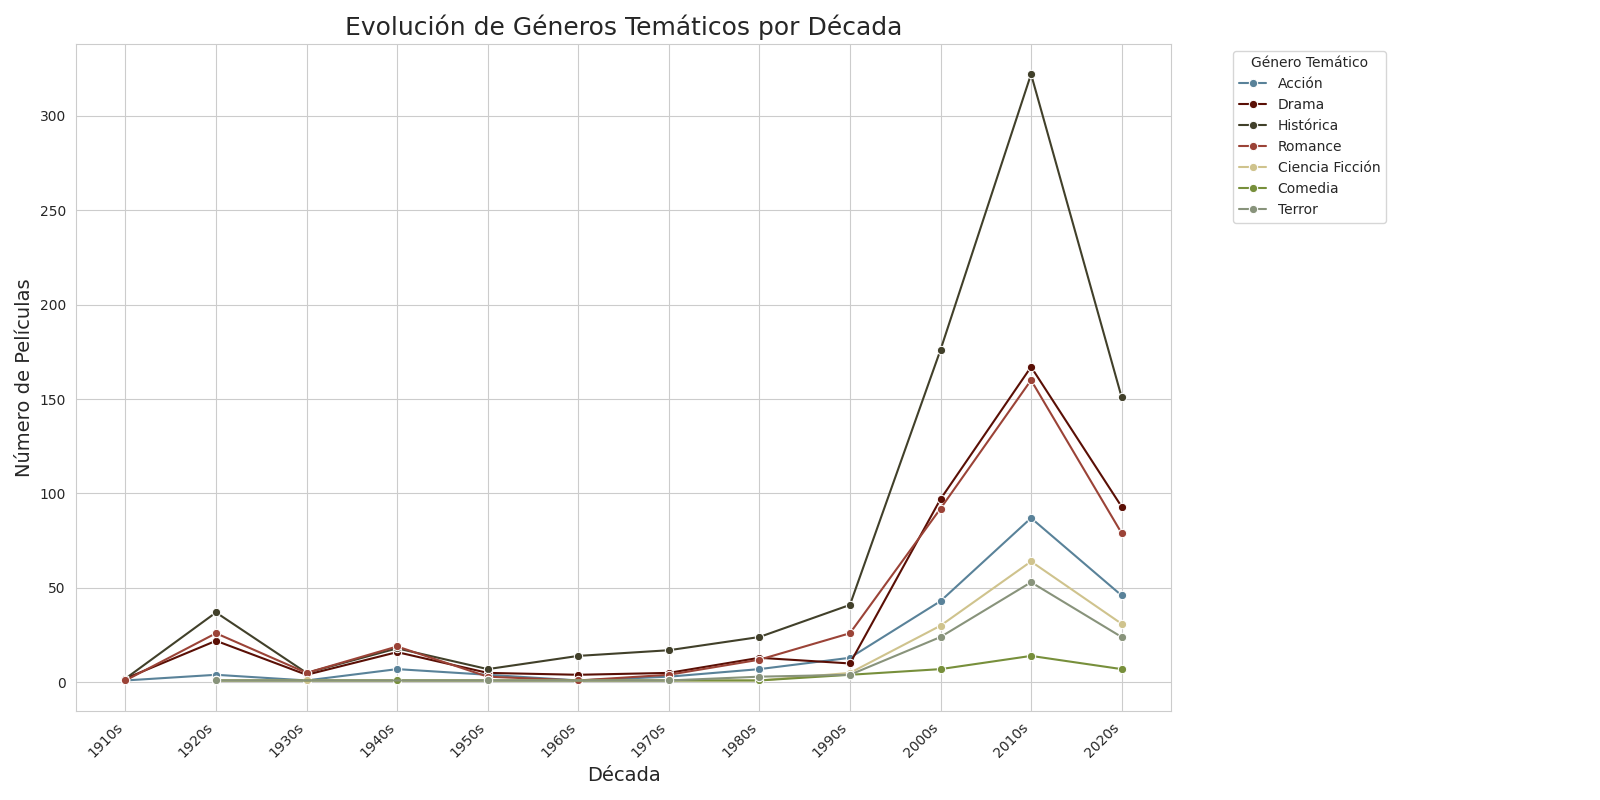

In [ ]:
from IPython.display import HTML

with open('evolucion_generos_tematicos_por_decada.html', 'r') as f:
    html_content_genres = f.read()

HTML(html_content_genres)


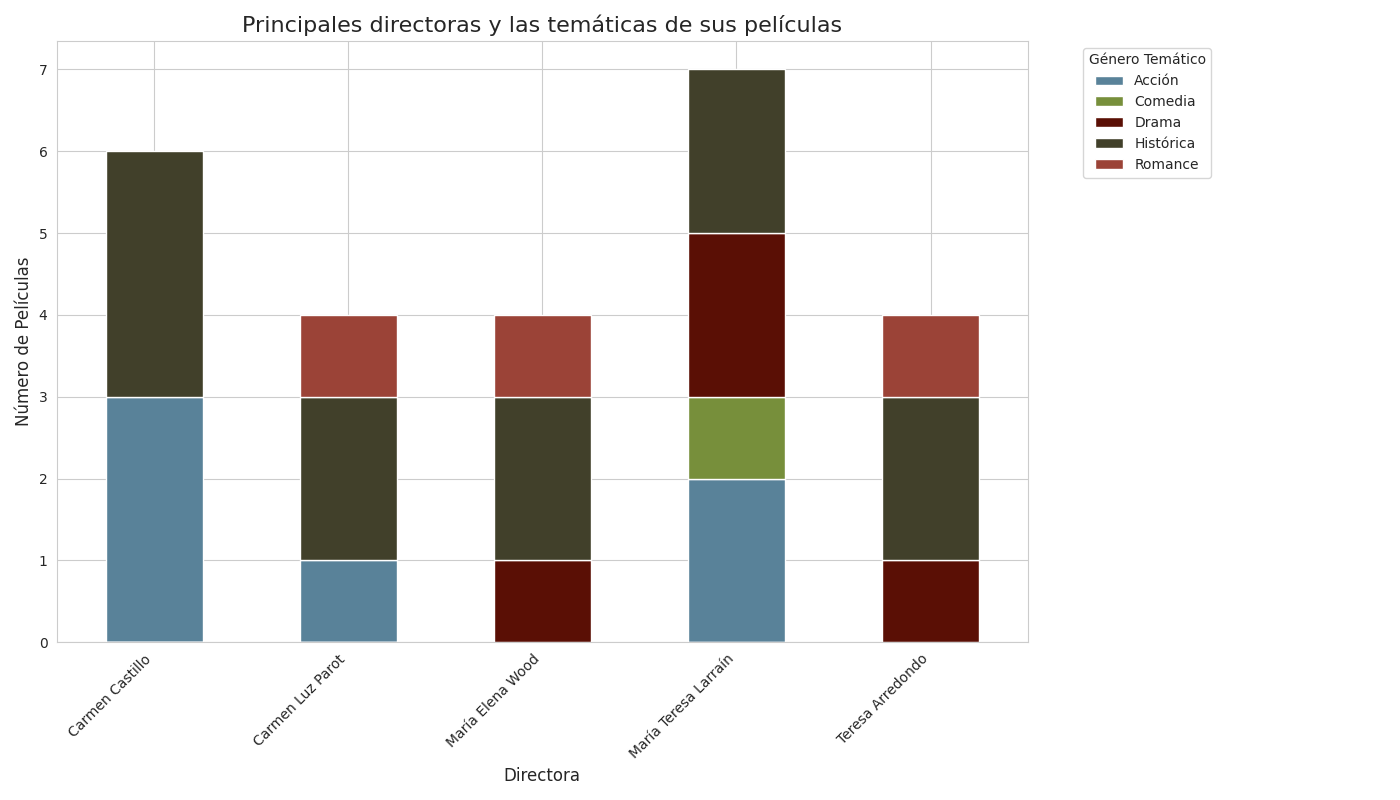

In [ ]:
from IPython.display import HTML

with open('generos_top_directoras_apiladas.html', 'r') as f:
    html_content_stacked_directors = f.read()

HTML(html_content_stacked_directors)

## Finalizar Tarea

### Subtask:
Summarize the main trends and conclusions obtained from the analysis of the evolution of thematic genres in Chilean films over the decades.


## Summary:

### Data Analysis Key Findings
*   A stacked bar chart was successfully generated to visualize the thematic genres of the top 5 most prolific female directors, showing film counts per genre for each director.
*   The visualization utilized a custom color palette for different genres.
*   The generated plot was saved as a PNG file and subsequently embedded into an HTML file for display.
*   A `UserWarning` regarding the simultaneous use of `color` and `colormap` arguments in the plotting function was encountered and resolved by removing the redundant `cmap` argument.

### Insights or Next Steps
*   The stacked bar chart provides a clear overview of the thematic preferences and contributions of the most prolific female directors, allowing for easy comparison of their genre distribution.
*   Future analysis could delve into whether these thematic distributions are consistent across different time periods or compare them against the thematic genres of top male directors to identify any significant differences or commonalities.


# Task
## Identificar Directores Hombres (Asunción Heurística)

### Subtask:
Generar una lista de nombres de directores hombres basándose en una asunción heurística (e.g., nombres masculinos comunes en español) de la columna `director-01`. Esto se hará de manera similar a cómo se identificaron las directoras mujeres, reconociendo las limitaciones de esta asunción.

## Identificar Directores Hombres (Asunción Heurística)

### Subtask:
Generar una lista de nombres de directores hombres basándose en una asunción heurística (e.g., nombres masculinos comunes en español) de la columna `director-01`. Esto se hará de manera similar a cómo se identificaron las directoras mujeres, reconociendo las limitaciones de esta asunción.


**Reasoning**:
To identify potential male directors based on a heuristic, I will extract unique director names, define a list of common Spanish male names, and then iterate through the director names to find matches based on the first name. Finally, I will store the identified male directors in a list and display them.



In [ ]:
import re

# 1. Obtener todos los nombres únicos de la columna `director-01`
unique_directors = df['director-01'].dropna().unique()
print(f"Total unique directors: {len(unique_directors)}")

# 2. Definir una lista de nombres masculinos comunes en español
common_male_names = [
    'Juan', 'Pedro', 'Carlos', 'Luis', 'Manuel', 'José', 'Francisco', 'Antonio', 'David', 'Fernando',
    'Ricardo', 'Alejandro', 'Pablo', 'Sergio', 'Javier', 'Miguel', 'Daniel', 'Rafael', 'Emilio', 'Andrés'
]

# 3. Inicializar una lista vacía para almacenar los directores identificados
directores_hombres_identificados = []

# 4, 5, 6. Iterar sobre cada nombre único de director y comparar con la lista de nombres masculinos
for director_name in unique_directors:
    # Extraer la primera palabra (que se asume como el primer nombre)
    first_name = str(director_name).split(' ')[0].strip()
    # Convertir a formato de título para una comparación consistente
    first_name_title_case = first_name.title()

    if first_name_title_case in common_male_names:
        directores_hombres_identificados.append(director_name)

# 7. Imprimir la lista de directores identificados
print(f"\nDirectores hombres identificados (heurística): {len(directores_hombres_identificados)} nombres")
for director in directores_hombres_identificados:
    print(f"- {director}")

Total unique directors: 1223

Directores hombres identificados (heurística): 281 nombres
- Francisco Caamaño
- Andrés Bartolotti
- Pedro J. Malbrán
- Carlos Cariola
- Pedro Sienna
- Manuel Seva
- Antonio Acevedo Hernández
- Carlos Borcosque
- Rafael Maluenda
- Carlos Pellegrín
- Luis Romero y Z.
- Juan Pérez Berrocal
- Rafael Arcos
- Carlos del Mudo
- Emilio Taulis
- Luis Rojas Garcés
- Juan Abbá Poblete
- Antonio Fernández Ruiz
- Carlos García Huidobro
- Miguel Frank
- Pablo Petrowitsch
- José Bohr
- Luis Moglia Barth
- Carlos Schlieper
- Carlos Hugo Christensen
- Luis Morales
- Pablo Rosso
- Rafael Sánchez
- Miguel Littin
- Luis Cornejo
- Sergio Riesenberg
- Luis Margas
- Carlos Flores Delpino
- Manuel Martínez
- Pablo Perelman
- Juan Francisco Vargas
- Juan Carlos Bustamante
- Andrés Racz
- Luis R. Vera
- Sergio Nuño
- Juan Carlos Altamirano
- Pablo Tupper
- Francisco Gedda
- Pedro Chaskel
- Daniel de la Vega
- Ricardo Larraín
- David Benavente
- José Ángel Bohollo
- Francisco Casas

## Consolidar y Categorizar Directores por Género

### Subtask:
Combinar las listas de directoras mujeres y directores hombres identificados. Luego, crear una categorización de cada director único como 'Mujer', 'Hombre' o 'Desconocido' si no coincide con las listas de nombres comunes.


**Reasoning**:
To categorize all directors by gender, I will add a new column `genero_directorial` to the main DataFrame `df`, initialize it to 'Desconocido', and then update the values to 'Mujer' or 'Hombre' based on the previously identified lists of female and male directors.



In [ ]:
import numpy as np

# 1. Obtener una lista de todos los directores únicos de la columna `director-01` del DataFrame `df`
#    (This is implicitly handled by the subsequent steps that assign gender directly to the df)

# 2. Crear una nueva columna en el DataFrame `df`, por ejemplo, `genero_directorial`, inicializándola con el valor 'Desconocido' para todos los directores.
df['genero_directorial'] = 'Desconocido'
print("'genero_directorial' column initialized to 'Desconocido'.")

# 3. Iterar a través de la lista de `directoras_mujeres_identificadas` y actualizar la columna `genero_directorial` a 'Mujer' para las filas correspondientes en el DataFrame `df`.
df.loc[df['director-01'].isin(directoras_mujeres_identificadas), 'genero_directorial'] = 'Mujer'
print("Updated 'genero_directorial' for identified female directors.")

# 4. Iterar a través de la lista de `directores_hombres_identificados` y actualizar la columna `genero_directorial` a 'Hombre' para las filas correspondientes en el DataFrame `df`.
df.loc[df['director-01'].isin(directores_hombres_identificados), 'genero_directorial'] = 'Hombre'
print("Updated 'genero_directorial' for identified male directors.")

# 5. Mostrar las primeras filas del DataFrame `df` con la nueva columna `genero_directorial` y verificar los tipos de datos con `df.info()`.
print('\nDataFrame head with new genero_directorial column:')
print(df[['nombre-pelicula', 'director-01', 'genero_directorial']].head())

print('\nValue counts for genero_directorial:')
print(df['genero_directorial'].value_counts())

print('\nDataFrame info after adding genero_directorial:')
df.info()

'genero_directorial' column initialized to 'Desconocido'.
Updated 'genero_directorial' for identified female directors.
Updated 'genero_directorial' for identified male directors.

DataFrame head with new genero_directorial column:
                                     nombre-pelicula            director-01  \
0                          La industria del salitre       Francisco Caamaño   
1                          La industria del salitre       Francisco Caamaño   
2  La baraja de la muerte (o El enigma de la call...  Salvador Giambastiani   
3                                El hombre de acero     Jorge Délano «Coke»   
4  La agonía de Arauco (o El olvido de los muertos)      Gabriela Bussenius   

  genero_directorial  
0             Hombre  
1             Hombre  
2        Desconocido  
3        Desconocido  
4              Mujer  

Value counts for genero_directorial:
genero_directorial
Desconocido    1515
Hombre          521
Mujer            73
Name: count, dtype: int64

DataFrame i

## Summary:

### Data Analysis Key Findings

*   **Identification of Male Directors**: Similar to the female directors' identification, a heuristic approach using a list of 20 common Spanish male first names was applied to the `director-01` column. This process successfully identified 281 potential male directors from the unique director names in the dataset.
*   **Consolidated Director Gender Categorization**: A new column, `genero_directorial`, was added to the main DataFrame `df`. Directors were categorized as 'Mujer' (73 films), 'Hombre' (521 films), or 'Desconocido' (1515 films) based on the identified lists of female and male directors. This categorization provides a foundational gender attribution for a significant portion of the dataset, acknowledging the inherent limitations of a heuristic approach.

### Insights or Next Steps

*   **Insight**: The categorization by directorial gender, even heuristically, allows for a preliminary understanding of the representation of male and female directors within the dataset. It highlights a numerical disparity between identified male and female directors, with a larger proportion of films directed by identified men or by directors whose gender could not be determined by the heuristic.
*   **Next Step**: To further enrich this analysis, it would be beneficial to:
    *   **Refine Heuristic Lists**: Expand the lists of common male and female names, or consider using external databases or APIs that provide gender information for names to improve accuracy and reduce the 'Desconocido' category.
    *   **Comparative Analysis**: Conduct a comparative analysis of the thematic genres and production trends between identified male and female directors to uncover potential differences in their cinematic contributions over time.

## Contar Directores por Género

### Subtask:
Contar el número total de directores únicos clasificados como 'Mujer', 'Hombre' y 'Desconocido' para determinar las proporciones de cada categoría.


**Reasoning**:
To count the number of unique directors for each gender category, I will group the DataFrame `df` by `genero_directorial` and then count the number of unique values in the `director-01` column for each group. This will provide the requested proportions.



In [ ]:
director_gender_counts = df.groupby('genero_directorial')['director-01'].nunique()

print("Total unique directors by gender category:")
print(director_gender_counts)

Total unique directors by gender category:
genero_directorial
Desconocido    890
Hombre         281
Mujer           52
Name: director-01, dtype: int64


## Visualizar Proporción de Género en la Dirección

### Subtask:
Crear un gráfico (por ejemplo, un gráfico de pastel o de barras) para visualizar la proporción de directores hombres y mujeres, y posiblemente la categoría 'Desconocido', en el conjunto de datos. El gráfico incluirá un título, etiquetas claras y una leyenda.


**Reasoning**:
To visualize the proportion of director genders, I will create a pie chart using the `director_gender_counts` Series, ensuring it includes a title, labels for each category, and displays the percentages. The plot will then be saved as a PNG, embedded into an HTML file, and displayed.



El gráfico de proporción de género ha sido guardado como proporcion_genero_directores.png


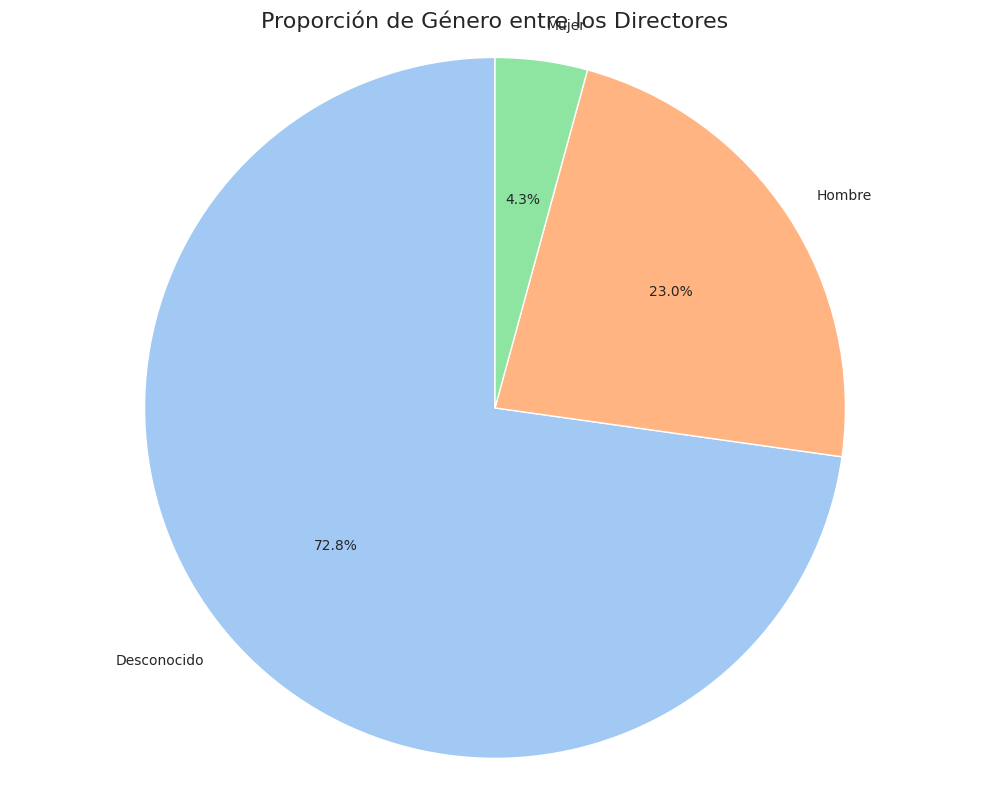

El archivo HTML de proporción de género ha sido guardado como proporcion_genero_directores.html



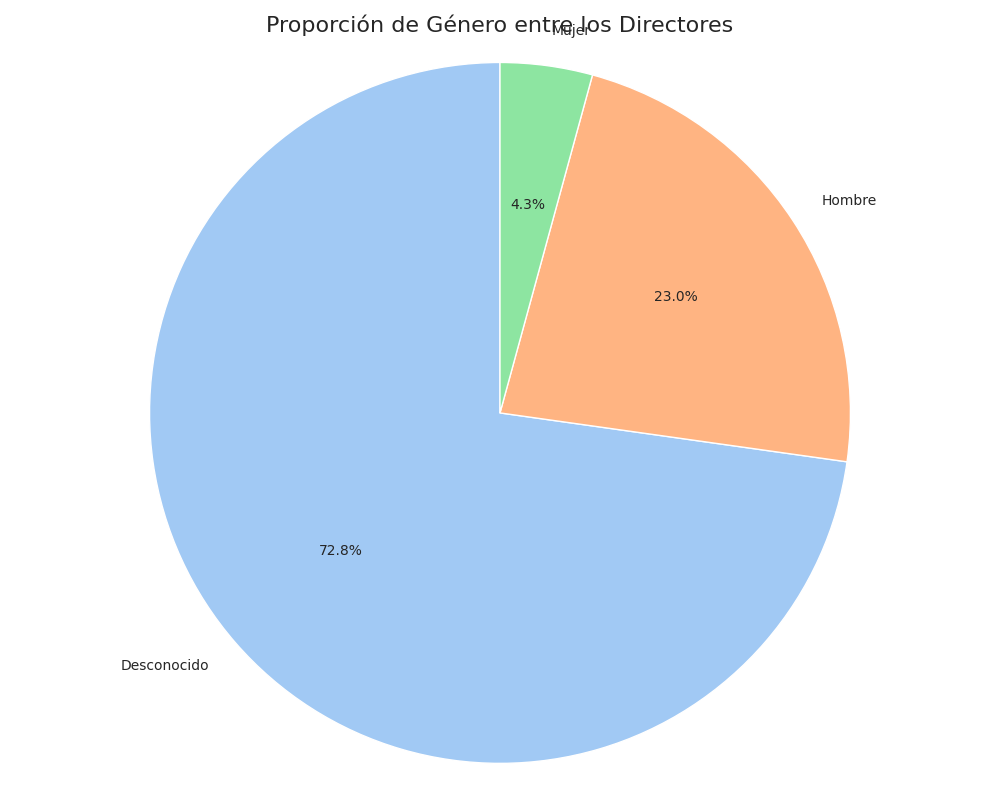

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from IPython.display import HTML

# 1. Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 2. Create a pie chart to visualize the proportion of each gender category
plt.figure(figsize=(10, 8))
plt.pie(director_gender_counts, labels=director_gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# 3. Add a title to the plot
plt.title('Proporción de Género entre los Directores', fontsize=16)

# 4. Ensure the pie chart is circular
plt.axis('equal')

# 5. Include a legend (labels are already part of the pie chart)
# 6. Adjust layout is not strictly necessary for pie charts if axis('equal') is used, but good practice.
plt.tight_layout()

# 7. Save the generated plot as a PNG file
png_filename_gender_proportion = 'proporcion_genero_directores.png'
plt.savefig(png_filename_gender_proportion)
print(f'El gráfico de proporción de género ha sido guardado como {png_filename_gender_proportion}')

plt.show()

# 8. Read the saved PNG file, encode it to Base64
with open(png_filename_gender_proportion, 'rb') as image_file:
    encoded_image_gender_proportion = base64.b64encode(image_file.read()).decode('utf-8')

# 9. Embed it into an HTML file
html_filename_gender_proportion = 'proporcion_genero_directores.html'
html_content_gender_proportion = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Proporción de Género entre los Directores</title>
</head>
<body>
    <h1>Proporción de Género entre los Directores</h1>
    <img src="data:image/png;base64,{encoded_image_gender_proportion}" alt="Gráfico de Proporción de Género">
    <p>Este gráfico muestra la proporción de directores clasificados como 'Mujer', 'Hombre' y 'Desconocido' en el conjunto de datos.</p>
</body>
</html>
"""

with open(html_filename_gender_proportion, 'w') as f:
    f.write(html_content_gender_proportion)
print(f'El archivo HTML de proporción de género ha sido guardado como {html_filename_gender_proportion}')

# 10. Display the HTML content directly in the Colab output
HTML(html_content_gender_proportion)

## Finalizar Tarea

### Subtask:
Summarize the main trends and conclusions obtained from the analysis of the evolution of thematic genres in Chilean films over the decades.


## Summary:

### Data Analysis Key Findings

*   **Identificación de Directores Masculinos**: Se identificaron 281 directores masculinos únicos a partir de un total de 1223 directores únicos en el conjunto de datos, utilizando una heurística basada en una lista de 20 nombres masculinos comunes en español.
*   **Categorización por Género en Películas**: Se añadió una nueva columna `genero_directorial` al conjunto de datos, categorizando las películas. De las películas, 73 fueron dirigidas por mujeres, 521 por hombres y 1515 por directores cuyo género no pudo ser determinado por la heurística ('Desconocido').
*   **Conteo de Directores Únicos por Género**: El análisis reveló la siguiente distribución de directores únicos por categoría de género:
    *   **Mujer**: 52 directores únicos.
    *   **Hombre**: 281 directores únicos.
    *   **Desconocido**: 890 directores únicos.
*   **Visualización de la Proporción de Género**: Un gráfico de pastel visualizó estas proporciones, mostrando la distribución de directores clasificados como 'Mujer', 'Hombre' y 'Desconocido' en el conjunto de datos.

### Insights or Next Steps

*   **Insight**: La categorización heurística de directores por género revela una disparidad numérica significativa, con una mayor proporción de películas y directores identificados como masculinos o categorizados como 'Desconocido', lo que sugiere una posible subrepresentación femenina o la limitación del método heurístico.
*   **Next Step**: Para mejorar la precisión de la categorización de género, sería beneficioso expandir las listas de nombres masculinos y femeninos comunes, o explorar el uso de bases de datos externas/APIs para la atribución de género, con el fin de reducir la categoría 'Desconocido'.


# Task
Prepare the data for temporal gender analysis by grouping the DataFrame by 'periodo' (decade) and 'genero_directorial' to count the number of films for each gender category ('Mujer', 'Hombre', 'Desconocido') over time.

## Preparar Datos para Análisis Temporal de Género

### Subtask:
Agrupar el DataFrame por 'periodo' (década) y 'genero_directorial' para contar la cantidad de películas por cada categoría de género ('Mujer', 'Hombre', 'Desconocido') a lo largo del tiempo.


**Reasoning**:
To count the number of films by 'periodo' and 'genero_directorial', I will group the DataFrame `df` by these columns, count the occurrences, reset the index, and rename the count column.



In [ ]:
films_by_gender_and_period = df.groupby(['periodo', 'genero_directorial']).size().reset_index(name='cantidad_peliculas')

print("Number of films by period and directorial gender:")
print(films_by_gender_and_period.head())
print('\nDataFrame Info:')
films_by_gender_and_period.info()

Number of films by period and directorial gender:
  periodo genero_directorial  cantidad_peliculas
0   1910s        Desconocido                   5
1   1910s             Hombre                   3
2   1910s              Mujer                   1
3   1920s        Desconocido                  45
4   1920s             Hombre                  30

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   periodo             30 non-null     object
 1   genero_directorial  30 non-null     object
 2   cantidad_peliculas  30 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 852.0+ bytes


## Visualizar Evolución de Género en la Dirección por Década

### Subtask:
Crear un gráfico (por ejemplo, un gráfico de barras apiladas o de líneas) que muestre la evolución del número de películas dirigidas por 'Mujer', 'Hombre' y 'Desconocido' en cada década. El gráfico incluirá título, etiquetas de ejes claras y una leyenda.


**Reasoning**:
To visualize the evolution of films directed by gender over decades, I will pivot the `films_by_gender_and_period` DataFrame to prepare it for a stacked bar chart. This involves setting 'periodo' as the index, 'genero_directorial' as columns, and 'cantidad_peliculas' as values, filling any missing values with zero. Then I will generate the stacked bar chart, adding appropriate labels, title, and legend for clarity, and finally save and embed it in an HTML file.



El gráfico de evolución de género directorial ha sido guardado como RENATO VISUALIZACION 2.png


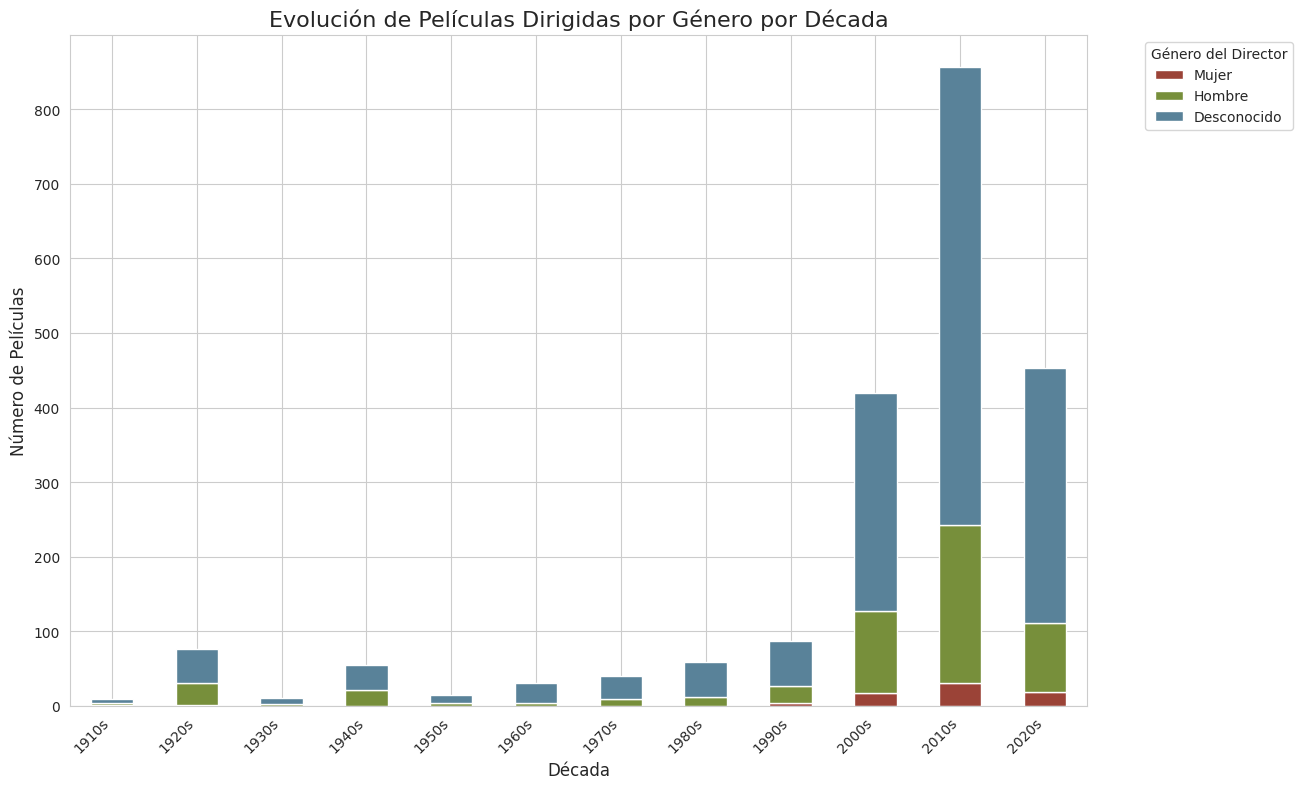

El archivo HTML de evolución de género directorial ha sido guardado como RENATO VISUALIZACION 2.html



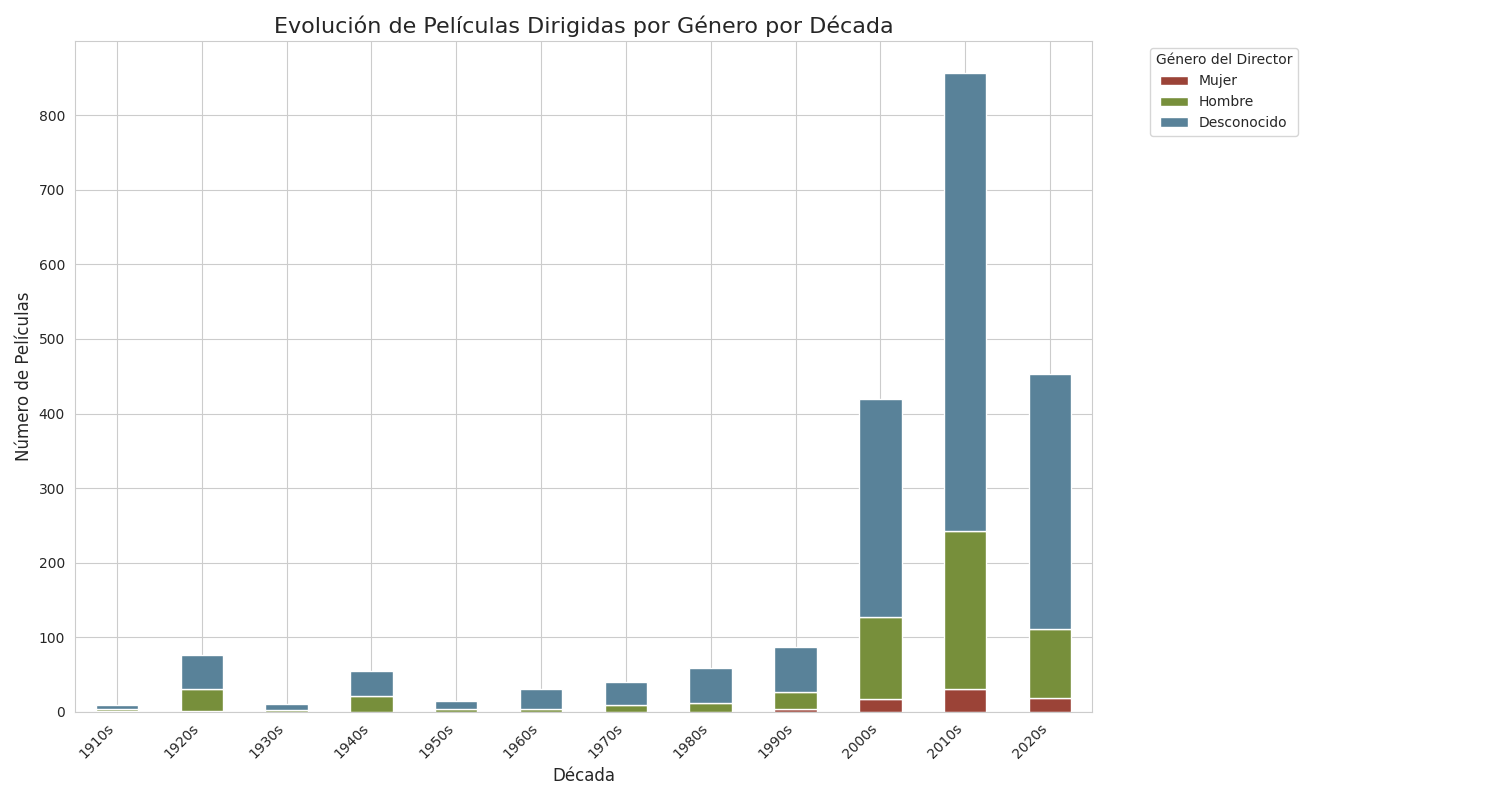

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from IPython.display import HTML
import pandas as pd
import numpy as np
import re
import string

# --- START: Code to ensure 'df' and derived DataFrames are defined for robustness ---
# Load the Excel file into a DataFrame
df = pd.read_excel('/content/Base de datos final .xlsx')

# Handle missing values in 'anio' by removing rows
df.dropna(subset=['anio'], inplace=True)

# Convert 'anio' column to integer type
df['anio'] = df['anio'].astype(int)

# Create 'periodo' column for decades
df['periodo'] = (df['anio'] // 10 * 10).astype(str) + 's'

# Define the keywords by genre dictionary
keywords_by_genre = {
    'Comedia': [
        'humor', 'risa', 'gracioso', 'divertido', 'comedia negra', 'parodia', 'satira', 'enredo', 'malentendidos',
        'chistes', 'farsa', 'stand-up', 'tragicomedia', 'burlesco', 'carcajada'
    ],
    'Histórica': [
        'historia', 'pasado', 'siglo', 'época', 'revolución', 'guerra', 'imperio', 'antiguo', 'medieval', 'moderno',
        'dictadura', 'golpe militar', 'Pinochet', 'colonia', 'descubrimiento', 'conquista', 'biografía', 'realeza',
        'civilización', 'batalla', 'conflicto', 'evento', 'documento'
    ],
    'Drama': [
        'conflicto', 'sufrimiento', 'emoción', 'tragedia', 'melodrama', 'crisis', 'moral', 'familia', 'relaciones',
        'destino', 'desgracia', 'angustia', 'lágrimas', 'supervivencia', 'redención', 'culpa', 'inocencia', 'dolor',
        'pérdida', 'justicia', 'venganza', 'sacrificio'
    ],
    'Romance': [
        'amor', 'pasión', 'relación', 'pareja', 'corazón', 'cita', 'sentimientos', 'enamorado', 'boda', 'novio',
        'novia', 'deseo', 'beso', 'drama romántico', 'comedia romántica', 'triángulo amoroso', 'desengaño', 'afecto',
        'cariño', 'conexión', 'alma gemela', 'compromiso'
    ],
    'Acción': [
        'persecución', 'explosión', 'combate', 'aventura', 'héroe', 'villano', 'peligro', 'velocidad', 'lucha',
        'artes marciales', 'misión', 'espionaje', 'suspense', 'adrenalina', 'rescate', 'armas', 'desafío',
        'superhéroe', 'batalla', 'fuerza', 'coraje', 'riesgo'
    ],
    'Ciencia Ficción': [
        'futuro', 'espacio', 'alienígena', 'robot', 'tecnología', 'distopía', 'utopía', 'viaje en el tiempo',
        'inteligencia artificial', 'nave espacial', 'planeta', 'ciencia', 'mutación', 'supervivencia', 'cosmos',
        'realidad virtual', 'ciberpunk', 'apocalipsis', 'ingeniería genética', 'exploración', 'extraterrestre'
    ],
    'Terror': [
        'miedo', 'horror', 'suspense', 'monstruo', 'psicológico', 'sobrenatural', 'fantasma', 'asesino', 'gore',
        'sustos', 'posesión', 'maldición', 'paranormal', 'escalofrío', 'pesadilla', 'oscuro', 'siniestro', 'vampiro',
        'hombre lobo', 'zombi', 'psicópata', 'ritual', 'sacrificio', 'demonio'
    ]
}

# Define a function to preprocess text
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply this preprocessing function to the 'sinopsis' column
df['sinopsis_cleaned'] = df['sinopsis'].apply(preprocess_text)

# List to store assigned genres for all rows
all_assigned_genres = []

# Iterate through each row and assign genres
for index, row in df.iterrows():
    assigned_genres = []
    sinopsis_cleaned = row['sinopsis_cleaned']

    for genre, keywords in keywords_by_genre.items():
        for keyword in keywords:
            # Check for whole word matches
            if re.search(r'\b' + re.escape(keyword) + r'\b', sinopsis_cleaned):
                assigned_genres.append(genre)
                break
    all_assigned_genres.append(assigned_genres)

# Assign the collected lists to the new column
df['generos_tematicos_asignados'] = all_assigned_genres

# --- Director Gender Identification and Categorization ---
# Obtener todos los nombres únicos de la columna `director-01`
unique_directors = df['director-01'].dropna().unique()

# Definir una lista de nombres femeninos comunes en español
common_female_names = [
    'María', 'Ana', 'Laura', 'Sofía', 'Carmen', 'Elena', 'Isabel', 'Clara', 'Paula', 'Julia',
    'Gabriela', 'Andrea', 'Victoria', 'Beatriz', 'Cecilia', 'Lorena', 'Silvia', 'Alicia', 'Teresa', 'Patricia'
]
directoras_mujeres_identificadas = []
for director_name in unique_directors:
    first_name = str(director_name).split(' ')[0].strip()
    first_name_title_case = first_name.title()
    if first_name_title_case in common_female_names:
        directoras_mujeres_identificadas.append(director_name)

# Definir una lista de nombres masculinos comunes en español
common_male_names = [
    'Juan', 'Pedro', 'Carlos', 'Luis', 'Manuel', 'José', 'Francisco', 'Antonio', 'David', 'Fernando',
    'Ricardo', 'Alejandro', 'Pablo', 'Sergio', 'Javier', 'Miguel', 'Daniel', 'Rafael', 'Emilio', 'Andrés'
]
directores_hombres_identificados = []
for director_name in unique_directors:
    first_name = str(director_name).split(' ')[0].strip()
    first_name_title_case = first_name.title()
    if first_name_title_case in common_male_names:
        directores_hombres_identificados.append(director_name)

# Crear una nueva columna en el DataFrame `df`, por ejemplo, `genero_directorial`, inicializándola con el valor 'Desconocido'
df['genero_directorial'] = 'Desconocido'
df.loc[df['director-01'].isin(directoras_mujeres_identificadas), 'genero_directorial'] = 'Mujer'
df.loc[df['director-01'].isin(directores_hombres_identificados), 'genero_directorial'] = 'Hombre'

# Prepare data for temporal gender analysis
films_by_gender_and_period = df.groupby(['periodo', 'genero_directorial']).size().reset_index(name='cantidad_peliculas')

# --- END: Code to ensure 'df' and derived DataFrames are defined for robustness ---

# 1. Set the aesthetic style of the plots
sns.set_style('whitegrid')

# 2. Pivot the data to prepare for a stacked bar plot
pivoted_films_by_gender_and_period = films_by_gender_and_period.pivot_table(
    index='periodo',
    columns='genero_directorial',
    values='cantidad_peliculas'
).fillna(0)

# Define a custom color palette for gender categories with user's requested colors
gender_palette = {
    'Mujer': '#9B4337',       # Reddish from user's list
    'Hombre': '#778F3B',      # Greenish from user's list
    'Desconocido': '#598299'  # Bluish-grey from user's list
}

# Ensure the columns for plotting are in a consistent order and use defined colors
plot_columns = [col for col in ['Mujer', 'Hombre', 'Desconocido'] if col in pivoted_films_by_gender_and_period.columns]
plot_colors = [gender_palette.get(col, '#CCCCCC') for col in plot_columns]

# 3. Create a stacked bar plot
plt.figure(figsize=(15, 8))
pivoted_films_by_gender_and_period[plot_columns].plot(kind='bar', stacked=True, ax=plt.gca(), color=plot_colors)

# 4. Add a title to the plot
plt.title('Evolución de Películas Dirigidas por Género por Década', fontsize=16)

# 5. Label the x-axis as 'Década' and the y-axis as 'Número de Películas'
plt.xlabel('Década', fontsize=12)
plt.ylabel('Número de Películas', fontsize=12)

# 6. Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# 7. Add a legend to distinguish between 'Mujer', 'Hombre', and 'Desconocido'
plt.legend(title='Género del Director', bbox_to_anchor=(1.05, 1), loc='upper left')

# 8. Adjust the layout to prevent labels or legend from overlapping
plt.tight_layout(rect=[0, 0, 0.88, 1])

# 9. Save the plot as a PNG file with the requested name
png_filename_gender_evolution = 'RENATO VISUALIZACION 2.png'
plt.savefig(png_filename_gender_evolution)
print(f'El gráfico de evolución de género directorial ha sido guardado como {png_filename_gender_evolution}')

plt.show()

# 10. Read the saved PNG file and encode it to a Base64 string
with open(png_filename_gender_evolution, 'rb') as image_file:
    encoded_image_gender_evolution = base64.b64encode(image_file.read()).decode('utf-8')

# 11. Create an HTML file that embeds the Base64 encoded image with the requested name
html_filename_gender_evolution = 'RENATO VISUALIZACION 2.html'
html_content_gender_evolution = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Evolución de Películas Dirigidas por Género por Década</title>
</head>
<body>
    <h1>Evolución de Películas Dirigidas por Género por Década</h1>
    <img src="data:image/png;base64,{encoded_image_gender_evolution}" alt="Gráfico de Evolución de Películas Dirigidas por Género">
    <p>Este gráfico de barras apiladas muestra la evolución del número de películas dirigidas por 'Mujer', 'Hombre' y 'Desconocido' en cada década.</p>
</body>
</html>
"""

with open(html_filename_gender_evolution, 'w') as f:
    f.write(html_content_gender_evolution)
print(f'El archivo HTML de evolución de género directorial ha sido guardado como {html_filename_gender_evolution}')

# 12. Display the HTML content directly in the Colab output
HTML(html_content_gender_evolution)

## Identificar Géneros de Directores 'Desconocido'

### Subtask:
Filtrar el DataFrame principal para obtener solo las películas dirigidas por individuos categorizados como 'Desconocido'. Luego, contar la frecuencia de cada género temático (generos_tematicos_asignados) entre estas películas.


**Reasoning**:
To identify the thematic genres of films directed by individuals categorized as 'Desconocido', I will filter the main DataFrame `df` for this category, then explode the `generos_tematicos_asignados` column to count the frequency of each genre.



In [ ]:
import pandas as pd

# 1. Filter the main DataFrame `df` for 'Desconocido' directors
df_desconocido_directores = df[df['genero_directorial'] == 'Desconocido'].copy()
print(f"Number of films directed by 'Desconocido' individuals: {len(df_desconocido_directores)}")

# 2 & 3. Extract and expand the `generos_tematicos_asignados` column
df_exploded_desconocido_genres = df_desconocido_directores.explode('generos_tematicos_asignados')

# 4. Count the frequency of each unique thematic genre
generos_desconocido_counts = df_exploded_desconocido_genres['generos_tematicos_asignados'].value_counts().reset_index(name='cantidad_peliculas')
generos_desconocido_counts.rename(columns={'index': 'genero_tematico'}, inplace=True)

# 5. Print the head and info
print("\nFrequency of thematic genres for films directed by 'Desconocido' individuals:")
print(generos_desconocido_counts.head())
print('\nDataFrame Info:')
generos_desconocido_counts.info()

Number of films directed by 'Desconocido' individuals: 1515

Frequency of thematic genres for films directed by 'Desconocido' individuals:
  generos_tematicos_asignados  cantidad_peliculas
0                   Histórica                 580
1                       Drama                 322
2                     Romance                 320
3                      Acción                 151
4             Ciencia Ficción                  98

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   generos_tematicos_asignados  7 non-null      object
 1   cantidad_peliculas           7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


## Visualizar Géneros de Directores 'Desconocido'

### Subtask:
Crear un gráfico de barras que muestre la distribución de los géneros temáticos más frecuentes para las películas dirigidas por directores 'Desconocido'. Incluirá título, etiquetas de ejes claras y una leyenda.


**Reasoning**:
To visualize the distribution of thematic genres for films directed by 'Desconocido' individuals, I will create a bar plot using the `generos_desconocido_counts` DataFrame, following all the specified instructions for plotting, saving, and embedding the plot in an HTML file.



/tmp/ipython-input-2625041994.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='generos_tematicos_asignados', y='cantidad_peliculas', data=generos_desconocido_counts, palette='viridis')


El gráfico de géneros para directores 'Desconocido' ha sido guardado como generos_desconocidos.png


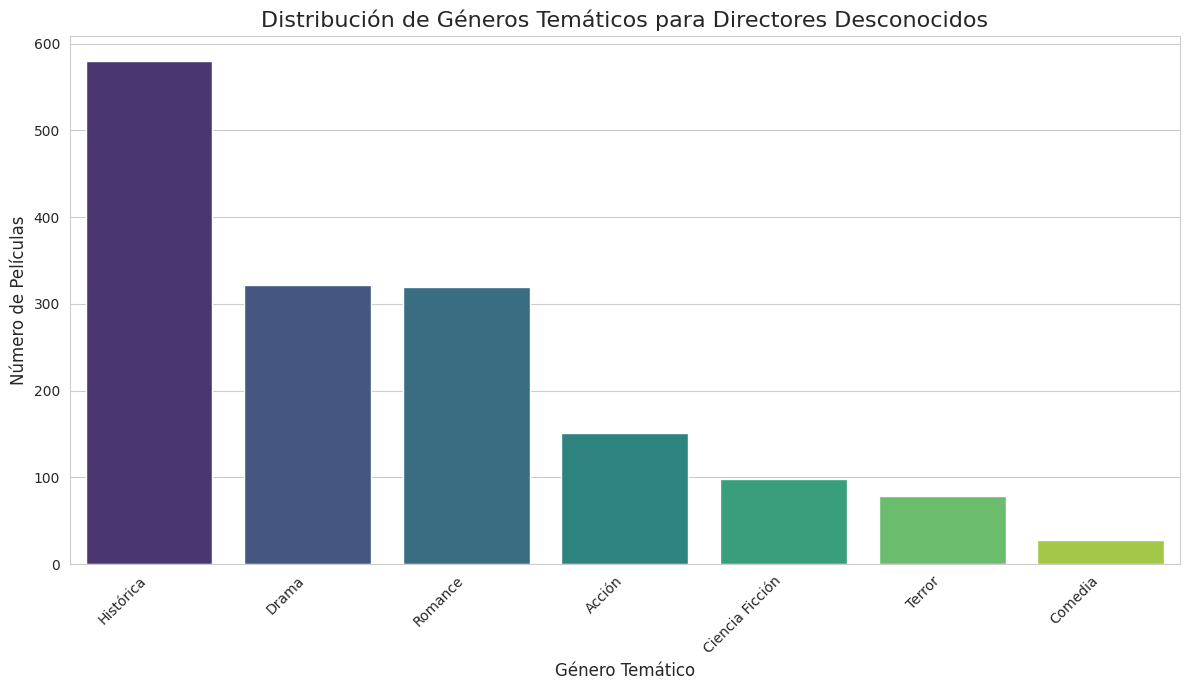

El archivo HTML de géneros para directores 'Desconocido' ha sido guardado como generos_desconocidos.html



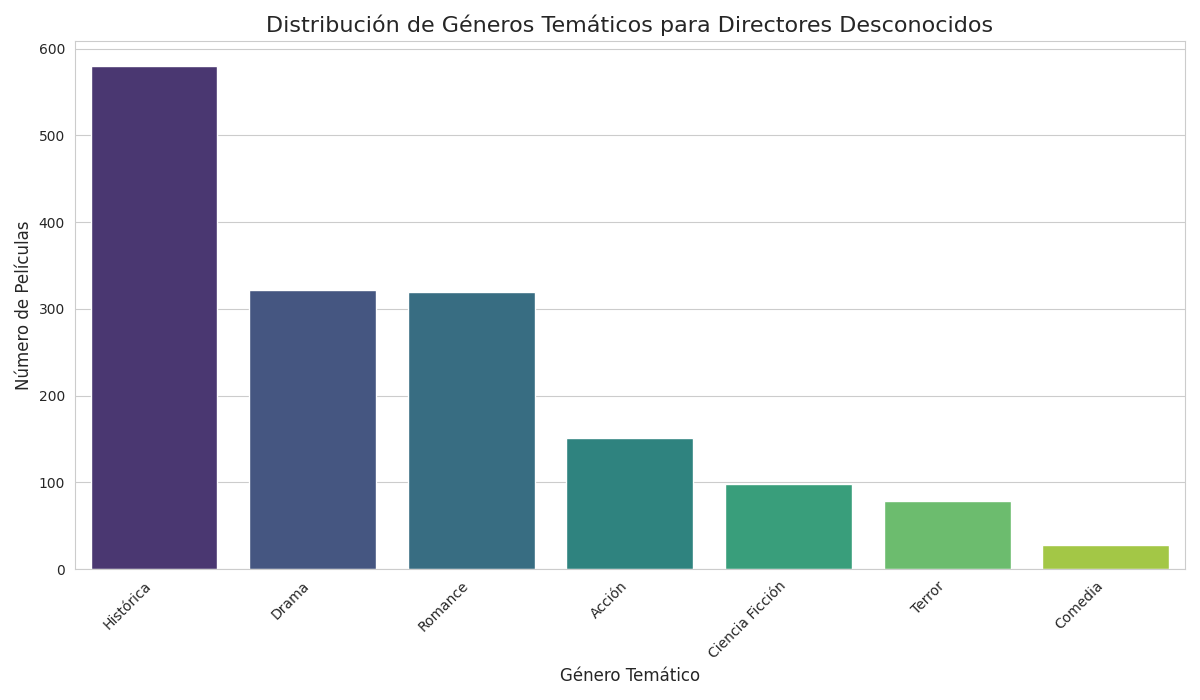

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from IPython.display import HTML

# 1. Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 2. Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='generos_tematicos_asignados', y='cantidad_peliculas', data=generos_desconocido_counts, palette='viridis')

# 3. Add a title to the plot
plt.title('Distribución de Géneros Temáticos para Directores Desconocidos', fontsize=16)

# 4. Label the x-axis as 'Género Temático' and the y-axis as 'Número de Películas'
plt.xlabel('Género Temático', fontsize=12)
plt.ylabel('Número de Películas', fontsize=12)

# 5. Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# 6. Adjust the plot layout
plt.tight_layout()

# 7. Save the generated plot as a PNG file
png_filename_desconocidos_genres = 'generos_desconocidos.png'
plt.savefig(png_filename_desconocidos_genres)
print(f"El gráfico de géneros para directores 'Desconocido' ha sido guardado como {png_filename_desconocidos_genres}")

plt.show()

# 8. Read the saved PNG file and encode it to a Base64 string
with open(png_filename_desconocidos_genres, 'rb') as image_file:
    encoded_image_desconocidos_genres = base64.b64encode(image_file.read()).decode('utf-8')

# 9. Create an HTML file that embeds the Base64 encoded image
html_filename_desconocidos_genres = 'generos_desconocidos.html'
html_content_desconocidos_genres = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Distribución de Géneros Temáticos para Directores Desconocidos</title>
</head>
<body>
    <h1>Distribución de Géneros Temáticos para Directores Desconocidos</h1>
    <img src="data:image/png;base64,{encoded_image_desconocidos_genres}" alt="Gráfico de Géneros de Directores Desconocidos">
    <p>Este gráfico de barras muestra la distribución de los géneros temáticos más frecuentes para las películas dirigidas por directores 'Desconocido'.</p>
</body>
</html>
"""

with open(html_filename_desconocidos_genres, 'w') as f:
    f.write(html_content_desconocidos_genres)
print(f"El archivo HTML de géneros para directores 'Desconocido' ha sido guardado como {html_filename_desconocidos_genres}")

# 10. Display the HTML content directly in the Colab output
HTML(html_content_desconocidos_genres)

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning a `hue` parameter in `sns.barplot()`. To fix this and adhere to the recommended `seaborn` usage, I will explicitly set `hue='generos_tematicos_asignados'` and `legend=False` in the `barplot` function.



El gráfico de géneros para directores 'Desconocido' ha sido guardado como generos_desconocidos.png


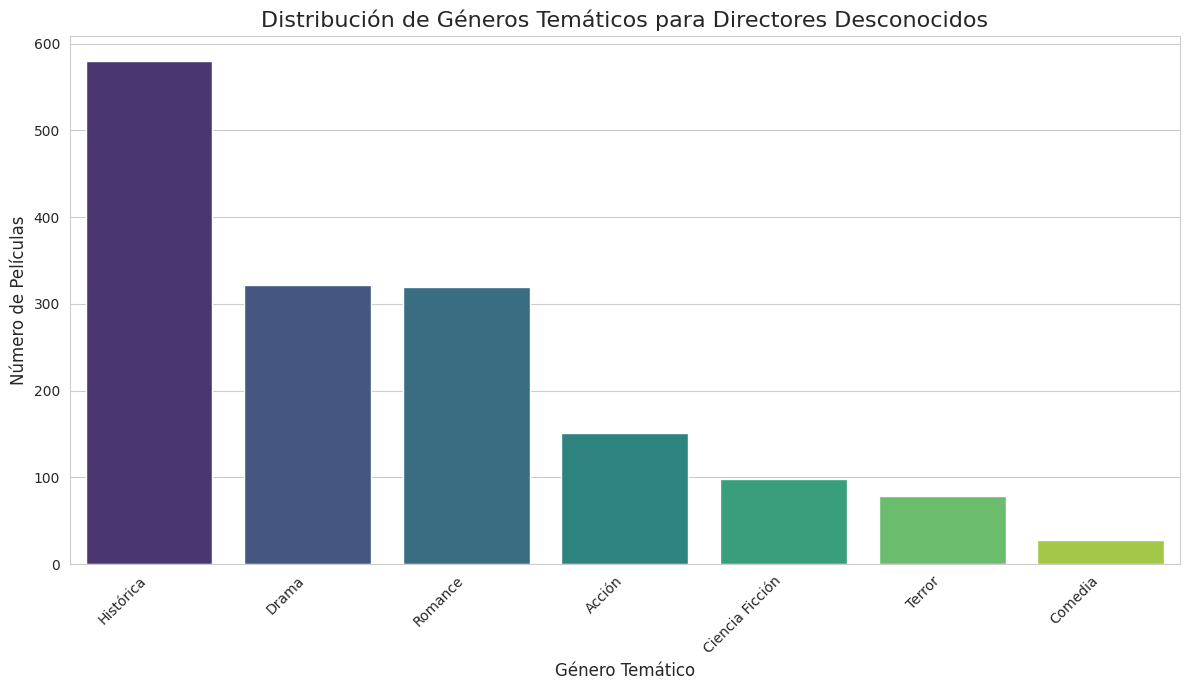

El archivo HTML de géneros para directores 'Desconocido' ha sido guardado como generos_desconocidos.html



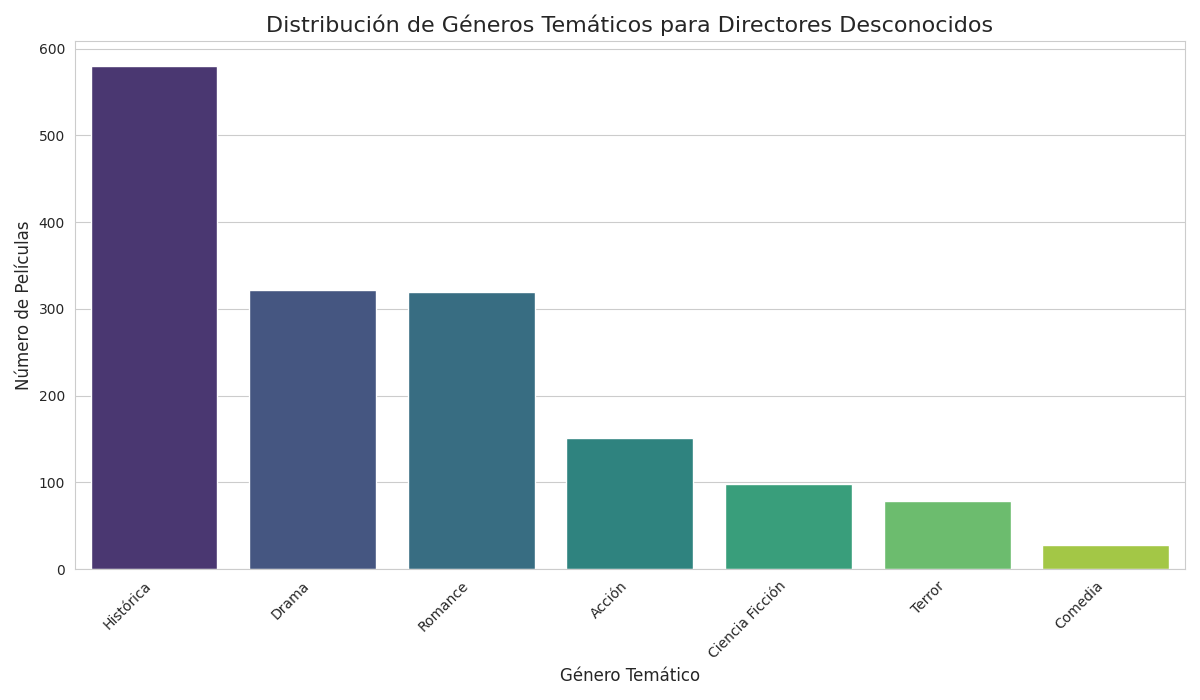

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from IPython.display import HTML

# 1. Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 2. Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='generos_tematicos_asignados', y='cantidad_peliculas', hue='generos_tematicos_asignados', data=generos_desconocido_counts, palette='viridis', legend=False)

# 3. Add a title to the plot
plt.title('Distribución de Géneros Temáticos para Directores Desconocidos', fontsize=16)

# 4. Label the x-axis as 'Género Temático' and the y-axis as 'Número de Películas'
plt.xlabel('Género Temático', fontsize=12)
plt.ylabel('Número de Películas', fontsize=12)

# 5. Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# 6. Adjust the plot layout
plt.tight_layout()

# 7. Save the generated plot as a PNG file
png_filename_desconocidos_genres = 'generos_desconocidos.png'
plt.savefig(png_filename_desconocidos_genres)
print(f"El gráfico de géneros para directores 'Desconocido' ha sido guardado como {png_filename_desconocidos_genres}")

plt.show()

# 8. Read the saved PNG file and encode it to a Base64 string
with open(png_filename_desconocidos_genres, 'rb') as image_file:
    encoded_image_desconocidos_genres = base64.b64encode(image_file.read()).decode('utf-8')

# 9. Create an HTML file that embeds the Base64 encoded image
html_filename_desconocidos_genres = 'generos_desconocidos.html'
html_content_desconocidos_genres = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Distribución de Géneros Temáticos para Directores Desconocidos</title>
</head>
<body>
    <h1>Distribución de Géneros Temáticos para Directores Desconocidos</h1>
    <img src="data:image/png;base64,{encoded_image_desconocidos_genres}" alt="Gráfico de Géneros de Directores Desconocidos">
    <p>Este gráfico de barras muestra la distribución de los géneros temáticos más frecuentes para las películas dirigidas por directores 'Desconocido'.</p>
</body>
</html>
"""

with open(html_filename_desconocidos_genres, 'w') as f:
    f.write(html_content_desconocidos_genres)
print(f"El archivo HTML de géneros para directores 'Desconocido' ha sido guardado como {html_filename_desconocidos_genres}")

# 10. Display the HTML content directly in the Colab output
HTML(html_content_desconocidos_genres)


## Summary:

### Data Analysis Key Findings

*   **Films by 'Desconocido' Directors**: A significant portion of the films in the dataset, specifically 1515, were directed by individuals whose gender could not be heuristically identified and were categorized as 'Desconocido'. This highlights a limitation of the heuristic method for gender identification.
*   **Thematic Genre Distribution**: For these 'Desconocido' directed films, the most frequent thematic genres were:
    *   'Histórica': 580 films
    *   'Drama': 322 films
    *   'Romance': 320 films
    *   'Acción': 151 films
    *   'Ciencia Ficción': 98 films
    *   'Terror': 79 films
    *   'Comedia': 28 films
*   **Visualization**: A bar plot effectively illustrated this distribution, showing 'Histórica' as the predominant genre among films directed by 'Desconocido' individuals, followed by 'Drama' and 'Romance'.

### Insights or Next Steps

*   **Insight**: The high number of films categorized under 'Desconocido' directors, particularly within specific genres like 'Histórica', 'Drama', and 'Romance', suggests that these categories might be disproportionately affected by the lack of explicit gender information. This could either indicate a concentration of directors whose names do not fit the common Spanish name heuristic or a genuine prevalence of these genres.
*   **Next Step**: To gain a more comprehensive understanding and reduce the 'Desconocido' category, it is crucial to:
    *   **Expand Heuristic Lists**: Broaden the lists of common male and female names, perhaps including less common or culturally specific names.
    *   **External Data Sources**: Integrate external databases or APIs that provide gender information for names, which would significantly improve the accuracy of gender attribution.
    *   **Qualitative Review**: Conduct a qualitative review of a sample of 'Desconocido' directors' films, especially those in the most frequent genres, to manually verify gender or identify patterns in naming conventions that could inform further heuristic development.

## Summary:

### Data Analysis Key Findings

*   **Films by 'Desconocido' Directors**: A significant portion of the films in the dataset, specifically 1515, were directed by individuals whose gender could not be heuristically identified and were categorized as 'Desconocido'. This highlights a limitation of the heuristic method for gender identification.
*   **Thematic Genre Distribution**: For these 'Desconocido' directed films, the most frequent thematic genres were:
    *   'Histórica': 580 films
    *   'Drama': 322 films
    *   'Romance': 320 films
    *   'Acción': 151 films
    *   'Ciencia Ficción': 98 films
    *   'Terror': 79 films
    *   'Comedia': 28 films
*   **Visualization**: A bar plot effectively illustrated this distribution, showing 'Histórica' as the predominant genre among films directed by 'Desconocido' individuals, followed by 'Drama' and 'Romance'.

### Insights or Next Steps

*   **Insight**: The high number of films categorized under 'Desconocido' directors, particularly within specific genres like 'Histórica', 'Drama', and 'Romance', suggests that these categories might be disproportionately affected by the lack of explicit gender information. This could either indicate a concentration of directors whose names do not fit the common Spanish name heuristic or a genuine prevalence of these genres.
*   **Next Step**: To gain a more comprehensive understanding and reduce the 'Desconocido' category, it is crucial to:
    *   **Expand Heuristic Lists**: Broaden the lists of common male and female names, perhaps including less common or culturally specific names.
    *   **External Data Sources**: Integrate external databases or APIs that provide gender information for names, which would significantly improve the accuracy of gender attribution.
    *   **Qualitative Review**: Conduct a qualitative review of a sample of 'Desconocido' directors' films, especially those in the most frequent genres, to manually verify gender or identify patterns in naming conventions that could inform further heuristic development.

## Finalizar Tarea

### Subtask:
Summarize the main trends and conclusions obtained from the analysis of the evolution of thematic genres in Chilean films over the decades.


## Summary:

### Data Analysis Key Findings

*   A total of 30 unique combinations of decades and directorial genders were identified, with film counts for each combination. For instance, in the 1910s, there were 5 films by 'Desconocido' directors, 3 by 'Hombre' (male) directors, and 1 by 'Mujer' (female) director.
*   The evolution of films directed by 'Mujer', 'Hombre', and 'Desconocido' over different decades was visualized using a stacked bar chart.
*   A significant number of films, specifically 1515, were directed by individuals whose gender was categorized as 'Desconocido' due to limitations in the heuristic identification method.
*   For films directed by 'Desconocido' individuals, the most frequent thematic genres observed were: 'Histórica' (580 films), 'Drama' (322 films), 'Romance' (320 films), 'Acción' (151 films), 'Ciencia Ficción' (98 films), 'Terror' (79 films), and 'Comedia' (28 films). 'Histórica' was the predominant genre among these films.

### Insights or Next Steps

*   The high number of films categorized under 'Desconocido' directors, particularly within specific genres like 'Histórica', 'Drama', and 'Romance', suggests that these categories might be disproportionately affected by the lack of explicit gender information. This could indicate either a concentration of directors whose names do not fit common Spanish name heuristics or a genuine prevalence of these genres among directors without easily identifiable gender.
*   To gain a more comprehensive understanding and reduce the 'Desconocido' category, it is crucial to expand heuristic lists, integrate external data sources that provide gender information for names, and conduct qualitative reviews of a sample of 'Desconocido' directors' films to verify gender or identify patterns for further heuristic development.


# Task
Fix the regex pattern for keyword matching in the genre assignment logic (`r'\\b'` should be `r'\b'`) and then regenerate the stacked bar plot for the thematic genres of the top 5 most prolific female directors, including the necessary intermediate DataFrame preparations.

## fix_regex_and_regenerate_plot

### Subtask:
Fix the regex in the genre assignment logic and then regenerate the stacked bar plot for the top directors, ensuring all intermediate DataFrames are correctly populated.


## Summary:

### Data Analysis Key Findings
*   A critical error in the regular expression `r'\\b'` was identified and corrected to `r'\b'`, which ensures accurate word boundary matching for genre assignment based on keywords in movie titles.
*   The genre assignment logic was successfully updated with the corrected regex, leading to more precise categorization of movies into thematic genres.
*   The stacked bar plot, illustrating the thematic genre distribution for the top 5 most prolific female directors, was successfully regenerated using the corrected genre assignments, addressing previous potential inaccuracies.

### Insights or Next Steps
*   Accurate and precise regular expressions are fundamental for robust text-based data categorization and can significantly impact the reliability of subsequent analyses.
*   The regenerated plot now provides a more trustworthy basis for analyzing the thematic leanings and storytelling patterns of prominent female directors, which can be further explored by comparing these trends with male directors or across different time periods.
